# Python Library - Pandas

This library deals with dataframe, which is good for tabular data or rectangular data structure.   
Row = observation (value)  
Column = variable  
It is similar to 2D NumPy array, but better - can house multiple **type** of data.  
This library is built on NumPy.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 0. Pandas data structure

key building blocks in Pandas:   
Indexes: Sequence of labels   
Series: 1D array with index (hybrid of dictionary and NumPy array)   
DataFrames: 2D array with Series as columns    


Indexes:   
Immutable (like dictionary keys)   
Homogenous in data type (like NumPy arrays)

## 1. create DataFrame from dictionary

In [18]:
dict = {
    "country":["Brazil","Russia","India","China","South Africa"],
    "capital":["Brasilia","Moscow","New Delhi","Beijing","Pretoria"],
    "area":[8.516,17.10,3.296,9.597,1.221],
    "population":[200.4,143.5,1252,1357,52.98]
}
#keys (col labels)   values (data, col by col)
bricks = pd.DataFrame(dict)

In [3]:
print(bricks)
print(type(bricks))

        country    capital    area  population
0        Brazil   Brasilia   8.516      200.40
1        Russia     Moscow  17.100      143.50
2         India  New Delhi   3.296     1252.00
3         China    Beijing   9.597     1357.00
4  South Africa   Pretoria   1.221       52.98
<class 'pandas.core.frame.DataFrame'>


pandas does automatic row labelling, to specify them manually:

In [11]:
bricks.index = ["BR","RU","IN","CH","SA"]
print(bricks)

         country    capital    area  population
BR        Brazil   Brasilia   8.516      200.40
RU        Russia     Moscow  17.100      143.50
IN         India  New Delhi   3.296     1252.00
CH         China    Beijing   9.597     1357.00
SA  South Africa   Pretoria   1.221       52.98


In [6]:
cities = ["Austin","Dallas","Austin","Dallas"]
signups = [7,12,15,12]
visitors = [123,34,243,674]
weekdays = ["Sun","Sun","Mon","Mon"]
list_labels = ["city", "signups","visitors","weekday"]
list_cols = [cities,signups,visitors,weekdays] #list of list

#The zip() function in Python 3 and above returns a special zip object, which is essentially a generator. To convert this zip object into a list, you'll need to use list()
zipped = list(zip(list_labels, list_cols)) #create a list of tuples
print(zipped)

data = dict(zipped)
print(data)

data_df = pd.DataFrame(data)
print(data_df)

[('city', ['Austin', 'Dallas', 'Austin', 'Dallas']), ('signups', [7, 12, 15, 12]), ('visitors', [123, 34, 243, 674]), ('weekday', ['Sun', 'Sun', 'Mon', 'Mon'])]
{'city': ['Austin', 'Dallas', 'Austin', 'Dallas'], 'signups': [7, 12, 15, 12], 'visitors': [123, 34, 243, 674], 'weekday': ['Sun', 'Sun', 'Mon', 'Mon']}
     city  signups  visitors weekday
0  Austin        7       123     Sun
1  Dallas       12        34     Sun
2  Austin       15       243     Mon
3  Dallas       12       674     Mon


## 2. create DataFrame from CSV file

In [2]:
bricks1 = pd.read_csv("../python_basics/data/brics.csv") #chunksize = XXX argument

In [3]:
print(bricks1)

  Unnamed: 0       country    capital    area  population
0         BR        Brazil   Brasilia   8.516      200.40
1         RU        Russia     Moscow  17.100      143.50
2         IN         India  New Delhi   3.286     1252.00
3         CH         China    Beijing   9.597     1357.00
4         SA  South Africa   Pretoria   1.221       52.98


In [4]:
bricks = pd.read_csv("../python_basics/data/brics.csv", index_col = 0)
print(bricks)

         country    capital    area  population
BR        Brazil   Brasilia   8.516      200.40
RU        Russia     Moscow  17.100      143.50
IN         India  New Delhi   3.286     1252.00
CH         China    Beijing   9.597     1357.00
SA  South Africa   Pretoria   1.221       52.98


In [5]:
#dropping two columns
bricks_dropped = bricks.drop(["capital","area"],axis="columns")
print(bricks_dropped)

         country  population
BR        Brazil      200.40
RU        Russia      143.50
IN         India     1252.00
CH         China     1357.00
SA  South Africa       52.98


In [6]:
# Read the file into a DataFrame: df
df = pd.read_csv("../python_basics/data/dob_job_application_filings_subset.csv")

# Print the head of df
print(df.head())
print("-----------------------------------------")
# Print the tail of df
print(df.tail())
print("-----------------------------------------")
# Print the shape of df
print(df.shape) #it is an attribute, not method, so no need ()
print("-----------------------------------------")
# Print the columns of df
print(df.columns) #it is an attribute, not method, so no need ()
print("-----------------------------------------")
#print the info of df
print(df.info())

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

   ...               Owner's Last Name             Owner's Business Name  \
0  ...  MIGLIORE                        MACKLOWE MANAGEMENT                
1  ...  BLUMENBERG                      NA            

## 3. access DataFrame using [ ]   

### 3.1 column access with column heading (together with row labels)

In [8]:
bricks["country"]

BR          Brazil
RU          Russia
IN           India
CH           China
SA    South Africa
Name: country, dtype: object

notice that the return object is a **pandas series** : 1D array that can be labelled.

In [9]:
type(bricks["country"])

pandas.core.series.Series

if you want to keep the data in a DataFrame, you need:

In [10]:
bricks[["country"]]

,country
BR,Brazil
RU,Russia
IN,India
CH,China
SA,South Africa


In [11]:
type(bricks[["country"]])

pandas.core.frame.DataFrame

you can select two column, therefore selecting a sub-DataFrame:

In [12]:
bricks[["country","capital"]]

,country,capital
BR,Brazil,Brasilia
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing
SA,South Africa,Pretoria


### 3.2 row access
can only be done using slicing.  

In [13]:
bricks[1:4] #select row 1 -> 4 (exclusive end, hence till 3), similar to Numpy 2D array with array[row, col]

,country,capital,area,population
RU,Russia,Moscow,17.100,143.5
IN,India,New Delhi,3.286,1252.0
CH,China,Beijing,9.597,1357.0


## 4. access DataFrame with loc and iloc

loc is label-based, i.e. select data based on labels.  
iloc is position-based.

### 4.1 row access (e.g. RU) using loc

In [14]:
bricks.loc["RU"] #gets pandas series, sometimes inconvenient as it is not in a data frame
type(bricks.loc["RU"])

pandas.core.series.Series

In [15]:
bricks.loc[["RU"]] #it's a DataFrame

,country,capital,area,population
RU,Russia,Moscow,17.1,143.5


In [16]:
bricks.loc[["RU","IN","CH"]] #more rows

,country,capital,area,population
RU,Russia,Moscow,17.100,143.5
IN,India,New Delhi,3.286,1252.0
CH,China,Beijing,9.597,1357.0


### 4.2 row and col access using loc

In [17]:
bricks.loc[["RU","IN","CH"],["country","capital"]] #intersection of the labels

,country,capital
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing


In [18]:
bricks.loc[:,["country","capital"]] #select all rows, then intersect with col label

,country,capital
BR,Brazil,Brasilia
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing
SA,South Africa,Pretoria


In [5]:
bricks.loc[:,"capital":"population"] #select all rows, then all col specified (both end enclosed)

,capital,area,population
0,Brasilia,8.516,200.40
1,Moscow,17.100,143.50
2,New Delhi,3.296,1252.00
3,Beijing,9.597,1357.00
4,Pretoria,1.221,52.98


### 4.3 row access with iloc

In [19]:
bricks.iloc[[1]] #1 row

,country,capital,area,population
RU,Russia,Moscow,17.1,143.5


In [20]:
bricks.iloc[[1,2,3]]

,country,capital,area,population
RU,Russia,Moscow,17.100,143.5
IN,India,New Delhi,3.286,1252.0
CH,China,Beijing,9.597,1357.0


### 4.4 row and col access with iloc

In [21]:
bricks.iloc[[1,2,3],[0,1]] #row, col

,country,capital
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing


In [22]:
bricks.iloc[:,[0,1]] # all row, then col

,country,capital
BR,Brazil,Brasilia
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing
SA,South Africa,Pretoria


## 5. select data based on condition

e.g. select country with area over 8 million km**2

select area column   
do comparison on area column   
use this result to select countries

In [23]:
bricks["area"] # we need series, not DataFrame

BR     8.516
RU    17.100
IN     3.286
CH     9.597
SA     1.221
Name: area, dtype: float64

In [24]:
bricks["area"] > 8 # get a series containing boolean

BR     True
RU     True
IN    False
CH     True
SA    False
Name: area, dtype: bool

In [25]:
is_huge = bricks["area"]>8
bricks[is_huge]

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
RU,Russia,Moscow,17.100,143.5
CH,China,Beijing,9.597,1357.0


In [26]:
bricks[bricks["area"]>8] #one-liner
#bricks.country[bricks.area > 1000] #select col based on other cols

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
RU,Russia,Moscow,17.100,143.5
CH,China,Beijing,9.597,1357.0


In [35]:
bricks_copy=bricks.copy() #copy to a new df
bricks_copy["trial"]=[0,0,1,2,3]
print(bricks_copy)
bricks_copy.loc[:,bricks_copy.all()] #select column with all nonzero
bricks_copy.loc[:,bricks_copy.any()] #select column with any nonzero
bricks_copy.loc[:,bricks_copy.isnull().any()] #select col with any NaNs
bricks_copy.loc[:,bricks_copy.notnull().any()] #select col without any NaNs

         country    capital    area  population  trial
BR        Brazil   Brasilia   8.516      200.40      0
RU        Russia     Moscow  17.100      143.50      0
IN         India  New Delhi   3.286     1252.00      1
CH         China    Beijing   9.597     1357.00      2
SA  South Africa   Pretoria   1.221       52.98      3


,country,capital,area,population,trial
BR,Brazil,Brasilia,8.516,200.40,0
RU,Russia,Moscow,17.100,143.50,0
IN,India,New Delhi,3.286,1252.00,1
CH,China,Beijing,9.597,1357.00,2
SA,South Africa,Pretoria,1.221,52.98,3


In [27]:
np.logical_and(bricks["area"]>8,bricks["area"]<10) #use logical_and after importing numpy, this is a series

BR     True
RU    False
IN    False
CH     True
SA    False
Name: area, dtype: bool

In [28]:
bricks[np.logical_and(bricks["area"]>8,bricks["area"]<10)] #put in bricks[] to subset properly

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
CH,China,Beijing,9.597,1357.0


In [29]:
for val in bricks: #only col header gets printed out
    print(val)

country
capital
area
population


In [30]:
for lab, row in bricks.iterrows(): #(row label, row series)
    print(lab) #first iteration, lab is BR
    print(row) #first iteration, row is entire pandas series

BR
country         Brazil
capital       Brasilia
area             8.516
population       200.4
Name: BR, dtype: object
RU
country       Russia
capital       Moscow
area            17.1
population     143.5
Name: RU, dtype: object
IN
country           India
capital       New Delhi
area              3.286
population         1252
Name: IN, dtype: object
CH
country         China
capital       Beijing
area            9.597
population       1357
Name: CH, dtype: object
SA
country       South Africa
capital           Pretoria
area                 1.221
population           52.98
Name: SA, dtype: object


In [31]:
for lab, row in bricks.iterrows():
    print(lab +": " + row["capital"]) #row is series, so can use selection

BR: Brasilia
RU: Moscow
IN: New Delhi
CH: Beijing
SA: Pretoria


## 6. add column in DataFrame

In [32]:
for lab, row in bricks.iterrows(): #add another column which is len of the country name
    bricks.loc[lab, "name_length"] = len(row["country"])

In [33]:
print(bricks)

         country    capital    area  population  name_length
BR        Brazil   Brasilia   8.516      200.40          6.0
RU        Russia     Moscow  17.100      143.50          6.0
IN         India  New Delhi   3.286     1252.00          5.0
CH         China    Beijing   9.597     1357.00          5.0
SA  South Africa   Pretoria   1.221       52.98         12.0


## 7. apply()

apply a function on a particular column in an element-wise fashion.  
efficient and fast - no for loop  

In [34]:
bricks["name_length"]=bricks["country"].apply(len)
print(bricks)

         country    capital    area  population  name_length
BR        Brazil   Brasilia   8.516      200.40            6
RU        Russia     Moscow  17.100      143.50            6
IN         India  New Delhi   3.286     1252.00            5
CH         China    Beijing   9.597     1357.00            5
SA  South Africa   Pretoria   1.221       52.98           12


## 8.1 Import data - CSV

2D labeled data with potentally different data types.   
ability to manipulate such data set.   
**Now the standard to import flat file is use pandas to import them as DataFrame.** if you need them as numpy array, you can then convert them to array using the *values* method.   
pandas also dealing with many issues such as comments, missing values etc.   
missing values commonly referred as NA or NaN

### read_csv()

In [7]:
filename = "../python_basics/data/titanic_sub.csv" #arg: nrows, header
data = pd.read_csv(filename) #arg: nrows, header, sep="\t", comment="#", na_values="Na", names= col_name(list of strings), parse_dates=[[0,1,2]], i.e. list contain the original col that has data
#arg:  index_col = "dates" and parse_dates = True will force a datetime64 index for "dates"
data.head() #first 5 rows

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
data_array = data.values #convert the dataframe into numpy array
data_array

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

## 8.2 Import data - Excel spreadsheets

In [9]:
file = "../python_basics/data/battledeath.xlsx"
data = pd.ExcelFile(file)
print(data.sheet_names) #name of all the data sheets
df1=data.parse("2002") #load sheet with name,
df2=data.parse(1) #load sheet with index
print(df1)
print(df2)

['2002', '2004']
    War, age-adjusted mortality due to       2002
0                          Afghanistan  36.083990
1                              Albania   0.128908
2                              Algeria  18.314120
3                              Andorra   0.000000
4                               Angola  18.964560
..                                 ...        ...
187                          Venezuela   0.000000
188                            Vietnam   0.040222
189                        Yemen, Rep.   0.074510
190                             Zambia   0.044548
191                           Zimbabwe  33.796200

[192 rows x 2 columns]
    War(country)      2004
0    Afghanistan  9.451028
1        Albania  0.130354
2        Algeria  3.407277
3        Andorra  0.000000
4         Angola  2.597931
..           ...       ...
187    Venezuela  0.000000
188      Vietnam  0.037507
189  Yemen, Rep.  3.602868
190       Zambia  0.041963
191     Zimbabwe  0.509568

[192 rows x 2 columns]


In [10]:
file = "../python_basics/data/battledeath.xlsx"
xl = pd.ExcelFile(file)
df1 = xl.parse(0, skiprows=[1], names=["Country","AAM due to War (2002)"]) #  skip the first row of data and name the columns 'Country' and 'AAM due to War (2002)' using the argument names. The values passed to skiprows and names all need to be of type list
print(df1.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000


In [11]:
file = "../python_basics/data/battledeath.xlsx"
xl = pd.ExcelFile(file)
df2 = xl.parse(1, usecols=[0], skiprows=[1],names=["Country"]) # parse only the first column with the parse_cols parameter, skip the first row and rename the column 'Country'. The argument passed to parse_cols (depreciated, use usecols) also needs to be of type list.
print(df2.head())

               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


## 8.3 Import data - SAS (Statistical Analysis System) and Stata files

SAS file extension:   
.sas7bdat: dataset files   
.sas7bcat: catalog files   

Stata file extension:   
.dta

In [12]:
from sas7bdat import SAS7BDAT

In [13]:
with SAS7BDAT("../python_basics/data/sales.sas7bdat") as file: #bind variable file to the file connection in a context manager
    df_sas=file.to_data_frame()
print(df_sas)

      YEAR           P            S
0   1950.0   12.900000   181.899994
1   1951.0   11.900000   245.000000
2   1952.0   10.700000   250.199997
3   1953.0   11.300000   265.899994
4   1954.0   11.200000   248.500000
5   1955.0   15.100000   278.399994
6   1956.0   16.200001   307.299988
7   1957.0   15.400000   320.000000
8   1958.0   12.700000   305.299988
9   1959.0   16.299999   338.000000
10  1960.0   15.200000   345.700012
11  1961.0   15.300000   356.399994
12  1962.0   17.700001   389.399994
13  1963.0   19.500000   412.700012
14  1964.0   23.200001   443.100006
15  1965.0   27.500000   492.200012
16  1966.0   30.900000   554.200012
17  1967.0   29.000000   575.400024
18  1968.0   32.099998   631.900024
19  1969.0   33.200001   694.599976
20  1970.0   28.600000   708.799988
21  1971.0   31.000000   751.099976
22  1972.0   36.500000   849.500000
23  1973.0   48.099998  1017.200012
24  1974.0   58.700001  1060.599976
25  1975.0   49.099998  1065.199951
26  1976.0   64.500000  1203

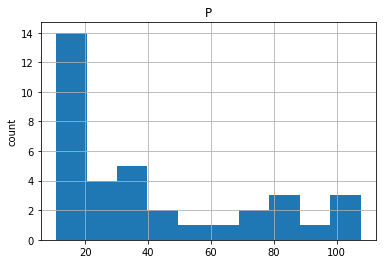

In [52]:
pd.DataFrame.hist(df_sas[['P']]) #default bin = 10
plt.ylabel('count')
plt.show()

In [14]:
data = pd.read_stata("../python_basics/data/disarea.dta")
print(data)

    wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0      AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1      AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2      ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3      ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4      ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   
..     ...                   ...    ...    ...    ...    ...    ...    ...   
159    YEM                 Yemen   0.00   0.03   0.00   0.00    0.0   0.00   
160    ZAF          South Africa   0.00   0.28   0.92   0.00    0.0   0.00   
161    ZAR                 Zaire   0.95   0.00   0.88   0.00    0.0   0.00   
162    ZMB                Zambia   0.16   0.16   0.44   0.00    0.0   0.00   
163    ZWE              Zimbabwe   0.00   0.00   0.98   0.00    0.0   0.00   

     disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20 

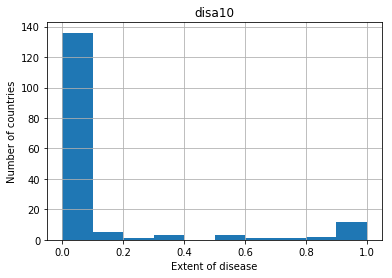

In [54]:
pd.DataFrame.hist(data[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()

## 9. Broadcasting

In [7]:
print(data_df)

     city  signups  visitors weekday
0  Austin        7       123     Sun
1  Dallas       12        34     Sun
2  Austin       15       243     Mon
3  Dallas       12       674     Mon


In [8]:
#broadcast a scalar value
data_df["fee"] = 0 #use a scaler value, it will broadcast to the entire column
print(data_df)

     city  signups  visitors weekday  fee
0  Austin        7       123     Sun    0
1  Dallas       12        34     Sun    0
2  Austin       15       243     Mon    0
3  Dallas       12       674     Mon    0


In [14]:
#broadcast string
heights = [50.3,60.4,55.6,67.8,56.6,23.5]
data_height = {"height": heights, "sex": "M"}
#print(data_height)
df_height = pd.DataFrame(data_height) #only broadcasted when converted to a df
print(df_height)

df_height.columns=["height(in)", "gender"] #change column label
df_height.index=["A","B","C","D","E","F"] #change row label (index)
print(df_height)

   height sex
0    50.3   M
1    60.4   M
2    55.6   M
3    67.8   M
4    56.6   M
5    23.5   M
   height(in) gender
A        50.3      M
B        60.4      M
C        55.6      M
D        67.8      M
E        56.6      M
F        23.5      M


In [15]:
print(df_height.index)

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


## 10. Datetime object - indexing time series

read_csv():   
can read strings into datetime objects.   
need specify *parse_dates=True*, it finds all compatible col in the df.      
transform into ISO 8601 format for the specified column (into datetime object): yyyy-mm-dd hh:mm:ss   
together with index_col = "Date"   

In [ ]:
#NO DATA, DO NOT RUN
#select single date time
sales.loc["2015-2-19 11:00:00", "Company"] #Company is a col name

#select whole day
sales.loc["2015-2-15"]

#partial select for month and year
sales.loc["2015-2"]
sales.loc["2015"]

#slicing using date time between two dates
sales.loc["2015-2-15","2015-3-15"]

### 10.1 Convert string into datetime object

In [3]:
evening_2_11 = pd.to_datetime(["2015-2-11 20:00","2015-2-11 21:00","2015-2-11 22:00","2015-2-11 23:00"])
evening_2_11

DatetimeIndex(['2015-02-11 20:00:00', '2015-02-11 21:00:00',
               '2015-02-11 22:00:00', '2015-02-11 23:00:00'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
#Reindex
sales.reindex(evening_2_11) # returns a new df that correspond to the 4 times listed. if none are matched, NaN is filled in.

#forward fill (to deal with missing entry)
sales.reindex(evening_2_11, method = "ffill")


#backward fill (to deal with missing entry)
sales.reindex(evening_2_11, method = "bfill")

In [ ]:
#NO DATA, DO NOT RUN
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  #date_list is pre-loaded, just a list of dates

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list,index=my_datetimes) #temperature_list is pre-loaded, just a a list of temp

## 11. Resampling

Statistical methods over different time interval: mean(), sum(), count() etc.   
downsampling: reduce datetime rows with lower frequency. opposite of upsampling


In [15]:
#resample to daily, get the sum for the day, same for mean() etc.
#sales.resample("D").sum() #returns a df, "W" for week, "2W" for 2 weeks
df_weather = pd.read_csv("../python_basics/data/weather_data_austin_2010.csv",parse_dates=True, index_col="Date")
print(df_weather.head())

                     Temperature  DewPoint  Pressure
Date                                                
2010-01-01 00:00:00         46.2      37.5       1.0
2010-01-01 01:00:00         44.6      37.1       1.0
2010-01-01 02:00:00         44.1      36.9       1.0
2010-01-01 03:00:00         43.8      36.9       1.0
2010-01-01 04:00:00         43.5      36.8       1.0


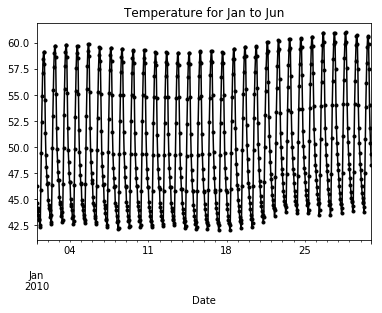

In [46]:
#Datetime data slicing, and then plot.
df_weather.loc["2010-01-01":"2010-01-30","Temperature"].plot(style="k.-",title="Temperature for Jan to Jun")

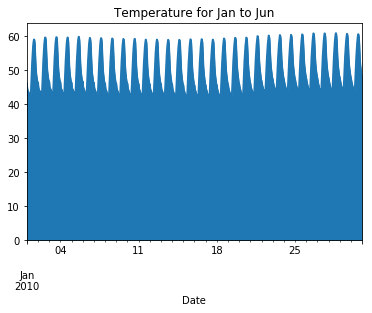

In [47]:
#Datetime data slicing, and then plot, area plot
df_weather.loc["2010-01-01":"2010-01-30","Temperature"].plot(kind="area",title="Temperature for Jan to Jun")

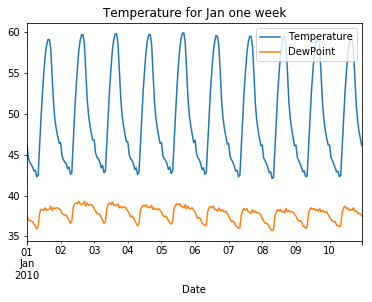

In [48]:
#Datetime, Col data slicing, and then use multiple plot
df_weather.loc["2010-01-01":"2010-01-10",["Temperature","DewPoint"]].plot(title="Temperature for Jan one week")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x120064240>,
      dtype=object)

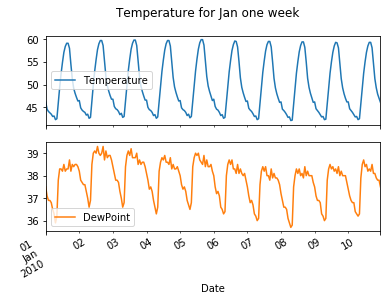

In [49]:
#Datetime, Col data slicing, and then use subplot
df_weather.loc["2010-01-01":"2010-01-10",["Temperature","DewPoint"]].plot(title="Temperature for Jan one week",subplots=True)

In [11]:
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df_weather.Temperature.resample("6h").mean()
print(df1)
# Downsample to daily data and count the number of data points: df2
df2 = df_weather.Temperature.resample("D").count()
print(df2)

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
2010-01-02 06:00:00    46.350000
2010-01-02 12:00:00    58.366667
2010-01-02 18:00:00    49.950000
2010-01-03 00:00:00    44.783333
2010-01-03 06:00:00    46.483333
2010-01-03 12:00:00    58.450000
2010-01-03 18:00:00    49.883333
2010-01-04 00:00:00    44.583333
2010-01-04 06:00:00    46.316667
2010-01-04 12:00:00    58.316667
2010-01-04 18:00:00    49.700000
2010-01-05 00:00:00    44.550000
2010-01-05 06:00:00    46.416667
2010-01-05 12:00:00    58.516667
2010-01-05 18:00:00    49.883333
2010-01-06 00:00:00    44.683333
2010-01-06 06:00:00    46.250000
2010-01-06 12:00:00    58.166667
2010-01-06 18:00:00    49.616667
2010-01-07 00:00:00    44.383333
2010-01-07 06:00:00    46.000000
2010-01-07 12:00:00    58.116667
2010-01-07 18:00:00    49.466667
2010-01-08 00:00:00    44.200000
2010-01-08 06:00:00    45.783333
     

In [13]:
# Extract temperature data for August: august
august = df_weather.Temperature.loc["2010-8"]

# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample("D").max()

# Extract temperature data for February: february
february = df_weather.Temperature.loc["2010-2"]

# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample("D").min()

print(august_highs)
print(february_lows)

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
2010-08-06    95.2
2010-08-07    95.3
2010-08-08    95.2
2010-08-09    95.2
2010-08-10    95.1
2010-08-11    95.0
2010-08-12    94.9
2010-08-13    95.0
2010-08-14    94.9
2010-08-15    94.7
2010-08-16    94.7
2010-08-17    94.8
2010-08-18    94.8
2010-08-19    94.8
2010-08-20    94.8
2010-08-21    94.7
2010-08-22    94.6
2010-08-23    94.5
2010-08-24    94.3
2010-08-25    94.1
2010-08-26    94.0
2010-08-27    93.7
2010-08-28    93.5
2010-08-29    93.3
2010-08-30    93.3
2010-08-31    93.1
Freq: D, Name: Temperature, dtype: float64
Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
2010-02-06    44.1
2010-02-07    44.3
2010-02-08    44.7
2010-02-09    44.7
2010-02-10    44.9
2010-02-11    45.2
2010-02-12    45.5
2010-02-13    46.0
2010-02-14    46.6
2010-02-15    46.9
2010-02-16    47.1
2010-02-17    47.2
2010-02-18    47.2
2010-02-19    47

## 12. DateTime method: .dt

In [2]:
#.dt specialise with datetime data
#extract the hour of the day from the Date column
df_weather1 = pd.read_csv("../python_basics/data/weather_data_austin_2010.csv",parse_dates=["Date"])
df_weather1["Date"].dt.hour #dun work if you set Date as the index_col, need reset

0        0
1        1
2        2
3        3
4        4
        ..
8754    19
8755    20
8756    21
8757    22
8758    23
Name: Date, Length: 8759, dtype: int64

In [34]:
#set timezone
gmt = df_weather1["Date"].dt.tz_localize("GMT") #set time to the datetime data, note that it returns a new series
gmt.dt.tz_convert("US/Eastern") # convert to the new time zone

#equivalently, method chaining
#df_weather1["Date"].dt.tz_localize("GMT").dt.tz_convert("US/Eastern")

0      2009-12-31 19:00:00-05:00
1      2009-12-31 20:00:00-05:00
2      2009-12-31 21:00:00-05:00
3      2009-12-31 22:00:00-05:00
4      2009-12-31 23:00:00-05:00
5      2010-01-01 00:00:00-05:00
6      2010-01-01 01:00:00-05:00
7      2010-01-01 02:00:00-05:00
8      2010-01-01 03:00:00-05:00
9      2010-01-01 04:00:00-05:00
10     2010-01-01 05:00:00-05:00
11     2010-01-01 06:00:00-05:00
12     2010-01-01 07:00:00-05:00
13     2010-01-01 08:00:00-05:00
14     2010-01-01 09:00:00-05:00
15     2010-01-01 10:00:00-05:00
16     2010-01-01 11:00:00-05:00
17     2010-01-01 12:00:00-05:00
18     2010-01-01 13:00:00-05:00
19     2010-01-01 14:00:00-05:00
20     2010-01-01 15:00:00-05:00
21     2010-01-01 16:00:00-05:00
22     2010-01-01 17:00:00-05:00
23     2010-01-01 18:00:00-05:00
24     2010-01-01 19:00:00-05:00
25     2010-01-01 20:00:00-05:00
26     2010-01-01 21:00:00-05:00
27     2010-01-01 22:00:00-05:00
28     2010-01-01 23:00:00-05:00
29     2010-01-02 00:00:00-05:00
          

## 13. Moving (rolling) average

To use the .rolling() method, you must always use method chaining, first calling .rolling() and then chaining an aggregation method after it. For example, with a Series hourly_data, hourly_data.rolling(window=24).mean() would compute new values for each hourly point, based on a 24-hour window stretching out behind each point. The frequency of the output data is the same: it is still hourly. Such an operation is useful for smoothing time series data.

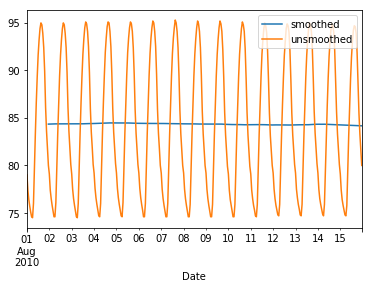

In [14]:
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df_weather['Temperature']["2010-08-01":"2010-08-15"]

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

In [15]:
# Extract the August 2010 data: august
august = df_weather['Temperature']["2010-08"]

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample("D").max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()
print(daily_highs_smoothed)

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64


## 14. String method in Pandas

In [2]:
dict = {
    "country":["Brazil","Russia","India","China","South Africa"],
    "capital":["Brasilia","Moscow","New Delhi","Beijing","Pretoria"],
    "area":[8.516,17.10,3.296,9.597,1.221],
    "population":[200.4,143.5,1252,1357,52.98]
}
#keys (col labels)   values (data, col by col)
data_bricks = pd.DataFrame(dict)

In [7]:
#Upper case for all data in the selected column in a DF
print(data_bricks)
data_bricks["capital"].str.upper() #a new series with the selected column is returned

        country    capital    area  population
0        Brazil   Brasilia   8.516      200.40
1        Russia     Moscow  17.100      143.50
2         India  New Delhi   3.296     1252.00
3         China    Beijing   9.597     1357.00
4  South Africa   Pretoria   1.221       52.98


0     BRASILIA
1       MOSCOW
2    NEW DELHI
3      BEIJING
4     PRETORIA
Name: capital, dtype: object

In [9]:
#Search for substring
data_bricks["capital"].str.contains("jing") #it also returns a new series

0    False
1    False
2    False
3     True
4    False
Name: capital, dtype: bool

In [12]:
#True = 1, False = 0, hence can be used to calculate how many rows are true. (i.e. contains "jing")
data_bricks["capital"].str.contains("jing").sum()

1

In [3]:
population = pd.read_csv("../python_basics/data/world_population.csv", parse_dates=True, index_col="Year")
print(population)

            Total Population
Year                        
1960-01-01      3.034971e+09
1970-01-01      3.684823e+09
1980-01-01      4.436590e+09
1990-01-01      5.282716e+09
2000-01-01      6.115974e+09
2010-01-01      6.924283e+09


In [38]:
# up-sample the data for every year, 
population.resample("A").first() #extracting the first data in every decade

,Total Population
Year,
1960-12-31,3.034971e+09
1961-12-31,NaN
1962-12-31,NaN
1963-12-31,NaN
1964-12-31,NaN
1965-12-31,NaN
1966-12-31,NaN
1967-12-31,NaN
1968-12-31,NaN


In [40]:
# Interpolate missing data, linear data fill in the missing values
population.resample("A").first().interpolate("linear")

,Total Population
Year,
1960-12-31,3.034971e+09
1961-12-31,3.099956e+09
1962-12-31,3.164941e+09
1963-12-31,3.229926e+09
1964-12-31,3.294911e+09
1965-12-31,3.359897e+09
1966-12-31,3.424882e+09
1967-12-31,3.489867e+09
1968-12-31,3.554852e+09


## 15. Transforming dataframe: computation element-wise in the dataframe

In [10]:
dict = {
    "month":["Jan","Feb","Mar","Apr","May","Jun"],
    "eggs":[47,110,221,77,132,205],
    "salt":[12.0,50.0,89.0,87.0,np.NaN,60.0],
    "spam":[17,31,72,20,52,55]
}
#keys (col labels)   values (data, col by col)
df_sales = pd.DataFrame(dict)
df_sales = df_sales.set_index("month")
print(df_sales)

       eggs  salt  spam
month                  
Jan      47  12.0    17
Feb     110  50.0    31
Mar     221  89.0    72
Apr      77  87.0    20
May     132   NaN    52
Jun     205  60.0    55


### 15.1 vectorized methods

In [11]:
#using Pandas built-in
df_sales.floordiv(12) #convert to dozen unit to all element rounded down

,eggs,salt,spam
month,,,
Jan,3,1.0,1
Feb,9,4.0,2
Mar,18,7.0,6
Apr,6,7.0,1
May,11,NaN,4
Jun,17,5.0,4


In [13]:
#using numpy built-in
np.floor_divide(df_sales,12) #its an alternative using numpy

,eggs,salt,spam
month,,,
Jan,3.0,1.0,1.0
Feb,9.0,4.0,2.0
Mar,18.0,7.0,6.0
Apr,6.0,7.0,1.0
May,11.0,NaN,4.0
Jun,17.0,5.0,4.0


In [15]:
#using Python funciton, and apply()
def dozens(n):
    return n//12

df_sales.apply(dozens) #apply to each entry in the dataframe

,eggs,salt,spam
month,,,
Jan,3,1.0,1
Feb,9,4.0,2
Mar,18,7.0,6
Apr,6,7.0,1
May,11,NaN,4
Jun,17,5.0,4


In [16]:
#using Python lambda function, together with apply()
df_sales.apply(lambda n: n//12)

,eggs,salt,spam
month,,,
Jan,3,1.0,1
Feb,9,4.0,2
Mar,18,7.0,6
Apr,6,7.0,1
May,11,NaN,4
Jun,17,5.0,4


In [19]:
#To preserve a computed result:
df_sales["dozens_of_eggs"]=df_sales.eggs.floordiv(12) #created new col to store the information
df_sales

,eggs,salt,spam,dozens_of_eggs
month,,,,
Jan,47,12.0,17,3
Feb,110,50.0,31,9
Mar,221,89.0,72,18
Apr,77,87.0,20,6
May,132,NaN,52,11
Jun,205,60.0,55,17


### 15.2 String values in DataFrame

In [23]:
#using str to access vectorized string transformation
df_sales.index=df_sales.index.str.upper() #cap the index
df_sales

,eggs,salt,spam,dozens_of_eggs
month,,,,
JAN,47,12.0,17,3
FEB,110,50.0,31,9
MAR,221,89.0,72,18
APR,77,87.0,20,6
MAY,132,NaN,52,11
JUN,205,60.0,55,17


In [25]:
#for index, there is no apply() method (unlike the entry), there is map() method
df_sales.index = df_sales.index.map(str.lower)
df_sales

,eggs,salt,spam,dozens_of_eggs
month,,,,
jan,47,12.0,17,3
feb,110,50.0,31,9
mar,221,89.0,72,18
apr,77,87.0,20,6
may,132,NaN,52,11
jun,205,60.0,55,17


### 15.3 Defining new columns using other columns

In [26]:
#add a column arithmatically
df_sales["salty_egg"]=df_sales.salt+df_sales.dozens_of_eggs
df_sales

,eggs,salt,spam,dozens_of_eggs,salty_egg
month,,,,,
jan,47,12.0,17,3,15.0
feb,110,50.0,31,9,59.0
mar,221,89.0,72,18,107.0
apr,77,87.0,20,6,93.0
may,132,NaN,52,11,NaN
jun,205,60.0,55,17,77.0


## Example: Election

In [4]:
#using map() with a dictionary
df_election = pd.read_csv("../python_basics/data/pennsylvania2012_turnout.csv")
df_election.head()

,county,state,total,Obama,Romney,winner,voters,turnout,margin
0,Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
1,Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
2,Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
3,Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
4,Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118


In [31]:
# Create the dictionary: red_vs_blue
red_vs_blue = {"Obama":"blue","Romney":"red"}

# Use the dictionary to map the 'winner' column to the new column: election['color']
df_election['color'] = df_election["winner"].map(red_vs_blue)

# Print the output of election.head()
print(df_election.head())

      county state   total      Obama     Romney  winner  voters    turnout  \
0      Adams    PA   41973  35.482334  63.112001  Romney   61156  68.632677   
1  Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
2  Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
3     Beaver    PA   80015  46.032619  52.637630  Romney  115157  69.483401   
4    Bedford    PA   21444  22.057452  76.986570  Romney   32189  66.619031   

      margin color  
0  27.629667   red  
1  14.454399  blue  
2  37.204293   red  
3   6.605012   red  
4  54.929118   red  


### 15.4 Universal Function (UFuncs) or vectorized function

In [33]:
# Import zscore from scipy.stats
from scipy.stats import zscore

#Instead of using .apply() as you did in the earlier exercises, the zscore UFunc will take a pandas Series as input and return a NumPy array. 
#You will then assign the values of the NumPy array to a new column in the DataFrame.

# Call zscore with election['turnout'] as input: turnout_zscore
turnout_zscore = zscore(df_election["turnout"])

# Print the type of turnout_zscore
print(type(turnout_zscore))

# Assign turnout_zscore to a new column: election['turnout_zscore']
df_election["turnout_zscore"] = turnout_zscore

# Print the output of election.head()
print(df_election.head())

<class 'numpy.ndarray'>
      county state   total      Obama     Romney  winner  voters    turnout  \
0      Adams    PA   41973  35.482334  63.112001  Romney   61156  68.632677   
1  Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
2  Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
3     Beaver    PA   80015  46.032619  52.637630  Romney  115157  69.483401   
4    Bedford    PA   21444  22.057452  76.986570  Romney   32189  66.619031   

      margin color  turnout_zscore  
0  27.629667   red        0.853734  
1  14.454399  blue        0.439846  
2  37.204293   red        0.575650  
3   6.605012   red        1.018647  
4  54.929118   red        0.463391  


## 16. Panda Series

### 16.1 Creating a Pandas Series

In [37]:
#creating a Panda Series
prices = [10.70,10.86,10.74,10.71,10.79]
shares = pd.Series(prices)
print(shares) #notice the integer values from 0-1 associated with the prices values
type(shares)

0    10.70
1    10.86
2    10.74
3    10.71
4    10.79
dtype: float64


pandas.core.series.Series

In [38]:
#creating an index
days = ["Mon", "Tue","Wed","Thur","Fri"]
shares = pd.Series(prices, index=days)
print(shares)

Mon     10.70
Tue     10.86
Wed     10.74
Thur    10.71
Fri     10.79
dtype: float64


In [39]:
print(shares.index) #notice its dtype = object, typically associated with string in pandas

Index(['Mon', 'Tue', 'Wed', 'Thur', 'Fri'], dtype='object')


In [40]:
#we can slice the index like a list !
print(shares.index[2])
print(shares.index[:2])
print(shares.index[-2:])
print(shares.index.name) #there is a name attribute, currently is None, we will assgin later.

Wed
Index(['Mon', 'Tue'], dtype='object')
Index(['Thur', 'Fri'], dtype='object')
None


In [41]:
shares.index.name="weekday"
print(shares)

weekday
Mon     10.70
Tue     10.86
Wed     10.74
Thur    10.71
Fri     10.79
dtype: float64


### 16.2 Modifying index entries

In [42]:
#You CANNOT assign value directly into index (immutable)
shares.index[2]="wed"

TypeError: Index does not support mutable operations

In [43]:
#You CAN reassign the index (overwrite) them all at once:
shares.index=["Monday","Tuesday","Wednesday","Thursday","Friday"] #notice that it erases the name of the index
print(shares)

Monday       10.70
Tuesday      10.86
Wednesday    10.74
Thursday     10.71
Friday       10.79
dtype: float64


### 16.3 Assigning index (apart from set_index)

In [44]:
dict1 = {
    "month":["Jan","Feb","Mar","Apr","May","Jun"],
    "eggs":[47,110,221,77,132,205],
    "salt":[12.0,50.0,89.0,87.0,np.NaN,60.0],
    "spam":[17,31,72,20,52,55]
}
#keys (col labels)   values (data, col by col)
df_sales1 = pd.DataFrame(dict1)
df_sales1.index=df_sales1["month"] #notice it creates another col as the index
print(df_sales1)

      month  eggs  salt  spam
month                        
Jan     Jan    47  12.0    17
Feb     Feb   110  50.0    31
Mar     Mar   221  89.0    72
Apr     Apr    77  87.0    20
May     May   132   NaN    52
Jun     Jun   205  60.0    55


In [45]:
del df_sales1["month"] #remove the extra col
print(df_sales1)

       eggs  salt  spam
month                  
Jan      47  12.0    17
Feb     110  50.0    31
Mar     221  89.0    72
Apr      77  87.0    20
May     132   NaN    52
Jun     205  60.0    55


In [46]:
print(df_sales1.index.name)

month


In [47]:
print(df_sales1.columns)

Index(['eggs', 'salt', 'spam'], dtype='object')


In [48]:
print(type(df_sales.index))

<class 'pandas.core.indexes.base.Index'>


In [50]:
#create a new list of string, and replace the old index string
# Create the list of new indexes: new_idx. 
new_idx = [i.upper() for i in df_sales.index] #list comprehension

# Assign new_idx to sales.index
df_sales.index = new_idx

# Print the sales DataFrame
print(df_sales)

     eggs  salt  spam  dozens_of_eggs  salty_egg
JAN    47  12.0    17               3       15.0
FEB   110  50.0    31               9       59.0
MAR   221  89.0    72              18      107.0
APR    77  87.0    20               6       93.0
MAY   132   NaN    52              11        NaN
JUN   205  60.0    55              17       77.0


In [51]:
#assigning names to index and col
df_sales.index.name="MONTHS"
df_sales.columns.name="PRODUCTS"
print(df_sales)

PRODUCTS  eggs  salt  spam  dozens_of_eggs  salty_egg
MONTHS                                               
JAN         47  12.0    17               3       15.0
FEB        110  50.0    31               9       59.0
MAR        221  89.0    72              18      107.0
APR         77  87.0    20               6       93.0
MAY        132   NaN    52              11        NaN
JUN        205  60.0    55              17       77.0


## 17. Hierarchical Indexing

Multiindexing - hierarchical indexing.   
Ideally, we would like to have an index that can uniquely identify each row of data.   
Data with multiindexing should always be sorted first.   


In [5]:
df_stocks = pd.read_csv("../python_basics/data/stocks_sample.csv")
df_stocks #notice that there are repeated values in the Date and Symbol index

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21454100,AAPL


In [54]:
# we can use a tuple (Symbol, Date) to represent each record in the table uniquely
df_stocks = df_stocks.set_index(["Symbol","Date"])
print(df_stocks) #now the index comprises of two columns, this is a multiindex or hierarchical index

                    Close    Volume
Symbol Date                        
CSCO   2016-10-03   31.50  14070500
AAPL   2016-10-03  112.52  21701800
MSFT   2016-10-03   57.42  19189500
AAPL   2016-10-04  113.00  29736800
MSFT   2016-10-04   57.24  20085900
CSCO   2016-10-04   31.35  18460400
MSFT   2016-10-05   57.64  16726400
CSCO   2016-10-05   31.59  11808600
AAPL   2016-10-05  113.05  21454100


In [55]:
print(df_stocks.index)
print(df_stocks.index.name)
print(df_stocks.index.names)

MultiIndex(levels=[['AAPL', 'CSCO', 'MSFT'], ['2016-10-03', '2016-10-04', '2016-10-05']],
           codes=[[1, 0, 2, 0, 2, 1, 2, 1, 0], [0, 0, 0, 1, 1, 1, 2, 2, 2]],
           names=['Symbol', 'Date'])
None
['Symbol', 'Date']


### 17.1 Sorting index

In [56]:
df_stocks=df_stocks.sort_index() #this methods makes a new df in the memory
print(df_stocks) 

                    Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21454100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400


### 17.2 Indexing (individual row)

Data slicing can be perfermed on the sorted DF.   

In [57]:
df_stocks.loc[("CSCO","2016-10-04")]

Close           31.35
Volume    18460400.00
Name: (CSCO, 2016-10-04), dtype: float64

In [58]:
df_stocks.loc[("CSCO","2016-10-04"),"Volume"]

18460400.0

### 17.3 Slicing (outermost index)

In [59]:
df_stocks.loc["AAPL"]

,Close,Volume
Date,,
2016-10-03,112.52,21701800
2016-10-04,113.00,29736800
2016-10-05,113.05,21454100


In [60]:
df_stocks.loc["CSCO":"MSFT"]

Close    Volume
Symbol Date                       
CSCO   2016-10-03  31.50  14070500
       2016-10-04  31.35  18460400
       2016-10-05  31.59  11808600
MSFT   2016-10-03  57.42  19189500
       2016-10-04  57.24  20085900
       2016-10-05  57.64  16726400

### 17.4 Fancy indexing (using list, outermost index)

In [61]:
df_stocks.loc[(["AAPL","MSFT"],"2016-10-05"),:]

,,Close,Volume
Symbol,Date,,
AAPL,2016-10-05,113.05,21454100
MSFT,2016-10-05,57.64,16726400


In [62]:
df_stocks.loc[(["AAPL","MSFT"],"2016-10-05"),"Close"]

Symbol  Date      
AAPL    2016-10-05    113.05
MSFT    2016-10-05     57.64
Name: Close, dtype: float64

### 17.5 Fancy indexing (innermost index)

In [64]:
df_stocks.loc[("CSCO",["2016-10-05","2016-10-03"]),:] #pulls only two dates (from the innermost index)

Close    Volume
Symbol Date                       
CSCO   2016-10-03  31.50  14070500
       2016-10-05  31.59  11808600

### 17.5 Slicing (both indexes)

need to use built-in slice() from python because the tuple does not recognise : natively.   

In [65]:
df_stocks.loc[(slice(None),slice("2016-10-03","2016-10-04")),:] #slice for all dates between these two dates INCLUSIVE

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900

## 18. Pivoting

In [6]:
df_trials01 = pd.read_csv("../python_basics/data/trials_01.csv")
print(df_trials01)

   id treatment gender  response
0   1         A      F         5
1   2         A      M         3
2   3         B      F         8
3   4         B      M         9


In [9]:
#pivot one column
df_trials01.pivot(index="treatment",columns="gender", values="response") #create a new df, notice there is no ID here.

gender,F,M
treatment,,
A,5,3
B,8,9


In [10]:
#pivoting multiple columns
df_trials01.pivot(index="treatment",columns="gender") #if no values are specified, all the remaining cols will be used as value

id    response   
gender     F  M        F  M
treatment                  
A          1  2        5  3
B          3  4        8  9

### 18.1 pivot_table

pivot() might not always work : duplicated entry   
pivot() requires unique index/col pair to add in the values in the new df.   

In [7]:
#pivot_table
df_trials03 = pd.read_csv("../python_basics/data/trials_03.csv")
print(df_trials03)

   id treatment gender  response
0   1         A      F         5
1   2         A      M         3
2   3         A      M         8
3   4         A      F         9
4   5         B      F         1
5   6         B      M         8
6   7         B      F         4
7   8         B      F         6


In [30]:
#you see that pivot will not work here on a multi-index df.
df_trials03.pivot(index="treatment",columns="gender", values="response")

ValueError: Index contains duplicate entries, cannot reshape

In [31]:
df_trials03.pivot_table(index="treatment",columns="gender", values="response") #multiple entries will go through reduction: default = avg

gender,F,M
treatment,,
A,7.000000,5.5
B,3.666667,8.0


In [32]:
#frequency table
df_trials03.pivot_table(index="treatment",columns="gender", values="response", aggfunc="count") #aggfunc: other aggregation method

gender,F,M
treatment,,
A,2,2
B,3,1


## 19. Stacking and unstacking DataFrame

Pivoting will **not** work on directly on multi-level indexed DF.

In [12]:
#Create a multi-level index
print(df_trials01)
df_trials01_multi = df_trials01.set_index(["treatment","gender"])
print(df_trials01_multi)

   id treatment gender  response
0   1         A      F         5
1   2         A      M         3
2   3         B      F         8
3   4         B      M         9
                  id  response
treatment gender              
A         F        1         5
          M        2         3
B         F        3         8
          M        4         9


### 19.1 Unstacking a multi-index

Move some of the index level to the columns, making the dataframe shorter and wider (more cols, less rows)

In [13]:
print(df_trials01_multi)
df_trials01_multi.unstack(level="gender") # we have hirachical columns
# df_trials01_multi.unstack(level=1) #same effect, unstack 2nd level of index (0-index system)

                  id  response
treatment gender              
A         F        1         5
          M        2         3
B         F        3         8
          M        4         9


id    response   
gender     F  M        F  M
treatment                  
A          1  2        5  3
B          3  4        8  9

### 19.2 Stacking DataFrames

Make a wide dataframe thinner and longer

In [15]:
trials_by_gender = df_trials01_multi.unstack(level="gender")
print(trials_by_gender)

stacked = trials_by_gender.stack(level="gender") #move the gender to the inner most index
print(stacked)

          id    response   
gender     F  M        F  M
treatment                  
A          1  2        5  3
B          3  4        8  9
                  id  response
treatment gender              
A         F        1         5
          M        2         3
B         F        3         8
          M        4         9


## 19.3 Swapping levels

In [17]:
swapped = stacked.swaplevel(0,1)
print(swapped)

                  id  response
gender treatment              
F      A           1         5
M      A           2         3
F      B           3         8
M      B           4         9


In [18]:
#sort the index (row) as the previous step does not sort
sorted_trials = swapped.sort_index()
print(sorted_trials)

                  id  response
gender treatment              
F      A           1         5
       B           3         8
M      A           2         3
       B           4         9


### 20. Melting DataFrames

In [8]:
df_trials02 = pd.read_csv("../python_basics/data/trials_02.csv")
print(df_trials02)

  treatment  F  M
0         A  5  3
1         B  8  9


In [24]:
pd.melt(df_trials02, id_vars=["treatment"]) #id_vars = cols that remains in the new df.

,treatment,variable,value
0,A,F,5
1,B,F,8
2,A,M,3
3,B,M,9


In [25]:
pd.melt(df_trials02, id_vars=["treatment"],value_vars=["F","M"]) #value_vars = cols to convert to values in the new df

,treatment,variable,value
0,A,F,5
1,B,F,8
2,A,M,3
3,B,M,9


In [26]:
pd.melt(df_trials02, id_vars=["treatment"],var_name="gender", value_name="response") #rename value and v

,treatment,gender,response
0,A,F,5
1,B,F,8
2,A,M,3
3,B,M,9


In [27]:
pd.melt(df_trials02,col_level=0) #k-v pair

,variable,value
0,treatment,A
1,treatment,B
2,F,5
3,F,8
4,M,3
5,M,9


## 21. Groupby

Split-Apply-Combine concept:   
e.g. sales_bc.groupby("weekday").count()   
sales_bc: DataFrame   
weekday: Col name   

1) Split DataFrame into groups of rows using distinct value from the "weekday" column   
2) For each distinc value, apply the count() method to the group of rows   
3) Combine the results in a new DataFrame with the distinct values of weekday in the index.   

First select one (or more) columns to be groupby(), then select one (or more) columns to perform aggregation on.   

Instead of count() as the aggregation/reduction method, we can also use other statistical method:    
mean()   
std()   
sum()   
first(), last()   
min(), max()

In [4]:
sales_bc = pd.DataFrame(
{
    "weekday":["Sun","Sun","Mon","Mon"],
    "city":["Austin","Dallas","Austin","Dallas"],
    "bread":[139,237,326,456],
    "butter":[20,45,70,98]
}
)
print(sales_bc)

  weekday    city  bread  butter
0     Sun  Austin    139      20
1     Sun  Dallas    237      45
2     Mon  Austin    326      70
3     Mon  Dallas    456      98


In [5]:
#to see how many distinct entry found in the city, bread, butter data
#we can also get the info by filter, but we need to know the content first (filter by Mon or Sun e.g.)
sales_bc.groupby("weekday").count()

,city,bread,butter
weekday,,,
Mon,2,2,2
Sun,2,2,2


In [6]:
#Total amount of bread sold on each day
sales_bc.groupby("weekday")["bread"].sum() #[] can select one or more for the aggregation

weekday
Mon    782
Sun    376
Name: bread, dtype: int64

In [7]:
#multiple col groupby
sales_bc.groupby("weekday")[["bread","butter"]].sum() #a list of cols is used here.

,bread,butter
weekday,,
Mon,782,168
Sun,376,65


In [8]:
#multi-level groupby
#avg no. of bread and butter bought at each of the 2 locations on Sun and Mon
sales_bc.groupby(["city","weekday"]).mean() #returns a sorted multi-level index

bread  butter
city   weekday               
Austin Mon        326      70
       Sun        139      20
Dallas Mon        456      98
       Sun        237      45

In [9]:
# we can use any other pandas series with the same index value (with this DataFrame)
# identical index as sales_bc, means who bought on that day and where
customers = pd.Series(["Dave","Alice","Bob","Alice"])
print(customers)

0     Dave
1    Alice
2      Bob
3    Alice
dtype: object


In [10]:
#how many bread each customers has bought
sales_bc.groupby(customers)["bread"].sum()

Alice    693
Bob      326
Dave     139
Name: bread, dtype: int64

In [15]:
#max no. of bread and butter in each city.
sales_bc.groupby("city")[["bread","butter"]].max()

,bread,butter
city,,
Austin,326,70
Dallas,456,98


## 21.1 .agg() method

In [16]:
#multiple aggregation
sales_bc.groupby("city")[["bread","butter"]].agg(["max","sum"]) #returns a df with multi-level index for cols.

bread      butter     
         max  sum    max  sum
city                         
Austin   326  465     70   90
Dallas   456  693     98  143

In [17]:
#aggfunc can have a list of pre-defined function like max,min,sum count, but also user-defined function or lib
def data_range(series): #it is an aggregation: receive a series and return a single value
    return series.max() - series.min()

sales_bc.groupby("weekday")[["bread","butter"]].agg(data_range)

,bread,butter
weekday,,
Mon,130,28
Sun,98,25


In [18]:
#.agg also accept a dict as input
#dict key are col name, value are agg function to apply on that col.
sales_bc.groupby(customers)[["bread","butter"]].agg({"bread":"sum","butter":data_range})

,bread,butter
Alice,693,53
Bob,326,0
Dave,139,0


## 21.2 .transform() method

Change DataFrame entries according to a specified function in-place without changing index.   
.transform apply function element wise to group (each element in the group, after you groupby())


In [9]:
auto=pd.read_csv("../python_basics/data/auto-mpg.csv")
print(auto.head())

    mpg  cyl  displ   hp  weight  accel  yr origin                       name
0  18.0    8  307.0  130    3504   12.0  70     US  chevrolet chevelle malibu
1  15.0    8  350.0  165    3693   11.5  70     US          buick skylark 320
2  18.0    8  318.0  150    3436   11.0  70     US         plymouth satellite
3  16.0    8  304.0  150    3433   12.0  70     US              amc rebel sst
4  17.0    8  302.0  140    3449   10.5  70     US                ford torino


In [21]:
#this function is transformation, take in a series, out a series
def zscore(series): #distance from mean, measured in unit of std
    return (series - series.mean()) / series.std()

In [22]:
# apply zscore function to mpg col.
zscore(auto["mpg"]).head() #this compares with all the years from 1970 to 1982

0   -0.697747
1   -1.082115
2   -0.697747
3   -0.953992
4   -0.825870
Name: mpg, dtype: float64

In [23]:
#zscore by year, we can groupby first !
#this gives zscore compared to yearly mean. Each "series" in the function is year.
auto.groupby("yr")["mpg"].transform(zscore).head()  

0    0.058125
1   -0.503753
2    0.058125
3   -0.316460
4   -0.129168
Name: mpg, dtype: float64

## 21.3 .apply()

For complicated case, can also use .apply() instead of transform.   

In [25]:
#output DF has 3 cols, specified as dict keys.
#dict values are selection from the input "group", 
#transform the mpg col
#take the yr and name col originally from the input.

def zscore_with_year_and_name(group):
    df=pd.DataFrame(
    {"mpg":zscore(group["mpg"]),
     "year":group["yr"],
     "name":group["name"]
    })
    return df


In [26]:
#this function is called 13 times, once for each year (i.e. each group, there is 13 group)
auto.groupby("yr").apply(zscore_with_year_and_name).head() 

,mpg,year,name
0,0.058125,70,chevrolet chevelle malibu
1,-0.503753,70,buick skylark 320
2,0.058125,70,plymouth satellite
3,-0.316460,70,amc rebel sst
4,-0.129168,70,ford torino


## 21.4 Filtering with Grouping, Aggregation and Transformation



In [29]:
print(auto.head()) #using the automobile dataset

    mpg  cyl  displ   hp  weight  accel  yr origin                       name
0  18.0    8  307.0  130    3504   12.0  70     US  chevrolet chevelle malibu
1  15.0    8  350.0  165    3693   11.5  70     US          buick skylark 320
2  18.0    8  318.0  150    3436   11.0  70     US         plymouth satellite
3  16.0    8  304.0  150    3433   12.0  70     US              amc rebel sst
4  17.0    8  302.0  140    3449   10.5  70     US                ford torino


In [34]:
#auto.groupby("yr")["mpg"].mean() gives means of mpg for each year (each group)
#but we want mean mpg for each year for Chevrolet
#we can filter the group before aggregating.

splitting = auto.groupby("yr") #save the output before aggregating
print(type(splitting))
print(type(splitting.groups)) #splitting has an attribute .groups which is just a dictionary
print(splitting.groups.keys()) #keys are the years, and its values are the corresponding rows of the original data

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'dict'>
dict_keys([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])


In [35]:
#we can iterate over splitting and carry out computation
for group_name, group in splitting:
    avg = group["mpg"].mean()
    print(group_name, avg)

70 17.689655172413794
71 21.11111111111111
72 18.714285714285715
73 17.1
74 22.76923076923077
75 20.266666666666666
76 21.573529411764707
77 23.375
78 24.061111111111114
79 25.09310344827585
80 33.803703703703704
81 30.185714285714287
82 32.0


In [38]:
#filter for chevrolet e.g.
for group_name, group in splitting:
    avg=group.loc[group["name"].str.contains("chevrolet"),"mpg"].mean()
    print(group_name, avg)

70 15.666666666666666
71 20.25
72 15.333333333333334
73 14.833333333333334
74 18.666666666666668
75 17.666666666666668
76 23.25
77 20.25
78 23.233333333333334
79 21.666666666666668
80 30.05
81 23.5
82 29.0


In [41]:
#rewrite the loop as a dict comprehension
chevy_means = {year:group.loc[group["name"].str.contains("chevrolet"),"mpg"].mean() for year, group in splitting}
pd.Series(chevy_means) #use the dict to construct a Pandas series

70    15.666667
71    20.250000
72    15.333333
73    14.833333
74    18.666667
75    17.666667
76    23.250000
77    20.250000
78    23.233333
79    21.666667
80    30.050000
81    23.500000
82    29.000000
dtype: float64

In [42]:
#Boolean Series / using Boolean groupby
chevy=auto["name"].str.contains("chevrolet")
auto.groupby(["yr",chevy])["mpg"].mean()

yr  name 
70  False    17.923077
    True     15.666667
71  False    21.260870
    True     20.250000
72  False    19.120000
    True     15.333333
73  False    17.500000
    True     14.833333
74  False    23.304348
    True     18.666667
75  False    20.555556
    True     17.666667
76  False    21.350000
    True     23.250000
77  False    23.895833
    True     20.250000
78  False    24.136364
    True     23.233333
79  False    25.488462
    True     21.666667
80  False    34.104000
    True     30.050000
81  False    30.433333
    True     23.500000
82  False    32.461538
    True     29.000000
Name: mpg, dtype: float64

In [11]:
#using map() to filter
titanic=pd.read_csv("../python_basics/data/titanic_data.csv")
# Create the Boolean Series: under10
under10 = (titanic['age'] < 10).map({True:'under 10', False:'over 10'})

# Group by under10 and compute the survival rate
survived_mean_1 = titanic.groupby(under10)["survived"].mean()
print(survived_mean_1)

# Group by under10 and pclass and compute the survival rate
survived_mean_2 = titanic.groupby([under10,"pclass"])["survived"].mean()
print(survived_mean_2)

age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64
age       pclass
over 10   1         0.617555
          2         0.380392
          3         0.238897
under 10  1         0.750000
          2         1.000000
          3         0.446429
Name: survived, dtype: float64


## 22. Categorical data

Uses less memory   
Speeds up operation like groupby()

In [11]:
sales_bc["weekday"].unique()

array(['Sun', 'Mon'], dtype=object)

In [13]:
sales_bc["weekday"]=sales_bc["weekday"].astype("category")
sales_bc["weekday"]

0    Sun
1    Sun
2    Mon
3    Mon
Name: weekday, dtype: category
Categories (2, object): [Mon, Sun]

## 23. idxmax() and idxmin() method on DataFrame

idxmax(): row or col label where max value is located.   
idxmin(): row or col label where min value is located.   


In [5]:
print(sales_bc)

,weekday,city,bread,butter
0,Sun,Austin,139,20
1,Sun,Dallas,237,45
2,Mon,Austin,326,70
3,Mon,Dallas,456,98


In [8]:
#can use arg: axis = "columns"
sales_bc["bread"].idxmax() #return index 3 (row) , this is done along rows. (across all rows, find max)


3

## 24. Reading multiple data files

### 24.1 Using a loop

In [13]:
filenames = ["../python_basics/data/Sales/sales-jan-2015.csv",
           "../python_basics/data/Sales/sales-feb-2015.csv"]

dataframes = [] #initialise an empty list
for f in filenames: #this is a list of dataframes
    dataframes.append(pd.read_csv(f))

In [14]:
print(dataframes[0])
print(dataframes[1])

                   Date          Company   Product  Units
0   2015-01-21 19:13:21        Streeplex  Hardware     11
1   2015-01-09 05:23:51        Streeplex   Service      8
2   2015-01-06 17:19:34          Initech  Hardware     17
3   2015-01-02 09:51:06            Hooli  Hardware     16
4   2015-01-11 14:51:02            Hooli  Hardware     11
5   2015-01-01 07:31:20  Acme Coporation  Software     18
6   2015-01-24 08:01:16          Initech  Software      1
7   2015-01-25 15:40:07          Initech   Service      6
8   2015-01-13 05:36:12            Hooli   Service      7
9   2015-01-03 18:00:19            Hooli   Service     19
10  2015-01-16 00:33:47            Hooli  Hardware     17
11  2015-01-16 07:21:12          Initech   Service     13
12  2015-01-20 19:49:24  Acme Coporation  Hardware     12
13  2015-01-26 01:50:25  Acme Coporation  Software     14
14  2015-01-15 02:38:25  Acme Coporation   Service     16
15  2015-01-06 13:47:37  Acme Coporation  Software     16
16  2015-01-15

### 24.2 Using a comprehension

In [6]:
# filenames same as above
# list comprehension is ideal for an empty list then append stuff in
dataframes1 = [pd.read_csv(f) for f in filenames]
print(dataframes[0])
print(dataframes[1])

                   Date          Company   Product  Units
0   2015-01-21 19:13:21        Streeplex  Hardware     11
1   2015-01-09 05:23:51        Streeplex   Service      8
2   2015-01-06 17:19:34          Initech  Hardware     17
3   2015-01-02 09:51:06            Hooli  Hardware     16
4   2015-01-11 14:51:02            Hooli  Hardware     11
5   2015-01-01 07:31:20  Acme Coporation  Software     18
6   2015-01-24 08:01:16          Initech  Software      1
7   2015-01-25 15:40:07          Initech   Service      6
8   2015-01-13 05:36:12            Hooli   Service      7
9   2015-01-03 18:00:19            Hooli   Service     19
10  2015-01-16 00:33:47            Hooli  Hardware     17
11  2015-01-16 07:21:12          Initech   Service     13
12  2015-01-20 19:49:24  Acme Coporation  Hardware     12
13  2015-01-26 01:50:25  Acme Coporation  Software     14
14  2015-01-15 02:38:25  Acme Coporation   Service     16
15  2015-01-06 13:47:37  Acme Coporation  Software     16
16  2015-01-15

### 24.3 Using glob

Best with files have similiar names.   
For the current working directory

In [ ]:
from glob import glob
#glob() will create an iterable object filenames containing all matching results
filenames = glob("sales*.csv") #* matchs 0 or more char
dataframes2 = [pd.read_csv(f) for f in filenames] #the iterable is consumed in the list comprehension

### Example: Olympic medals

In [15]:
#Read separately
# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv("../python_basics/data/Summer Olympic medals/Bronze.csv")

# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv("../python_basics/data/Summer Olympic medals/Silver.csv")

# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv("../python_basics/data/Summer Olympic medals/Gold.csv")

# Print the first five rows of gold
#print(gold.head())

In [16]:
#import using loop

# Create the list of file names: filenames
filenames = ['../python_basics/data/Summer Olympic medals/Bronze.csv',
             '../python_basics/data/Summer Olympic medals/Silver.csv',
             '../python_basics/data/Summer Olympic medals/Bronze.csv']

# Create the list of three DataFrames: dataframes
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))

# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head())

   NOC         Country   Total
0  USA   United States  1052.0
1  URS    Soviet Union   584.0
2  GBR  United Kingdom   505.0
3  FRA          France   475.0
4  GER         Germany   454.0


In [9]:
# a rather clumsy way to combine dataframe into 1 dataframe
# Make a copy of gold: medals
medals = gold.copy()

# Create list of new column labels: new_labels
new_labels = ['NOC', 'Country', 'Gold']

# Rename the columns of medals using new_labels
medals.columns = new_labels

# Add columns 'Silver' & 'Bronze' to medals
medals['Silver'] = silver["Total"]
medals['Bronze'] = bronze["Total"]

# Print the head of medals
print(medals.head())

   NOC         Country    Gold  Silver  Bronze
0  USA   United States  2088.0  1195.0  1052.0
1  URS    Soviet Union   838.0   627.0   584.0
2  GBR  United Kingdom   498.0   591.0   505.0
3  FRA          France   378.0   461.0   475.0
4  GER         Germany   407.0   350.0   454.0


## 25. Combing DataFrame with Reindexing

indices: many index label within an index data structure   
indexes: many pandas index data structure (associated with DataFrames), i.e. shared across multiple DataFrame


In [17]:
w_mean = pd.read_csv("../python_basics/data/quaterly_mean_temp.csv", index_col="Month")
w_max = pd.read_csv("../python_basics/data/quaterly_max_temp.csv",index_col="Month")
print(w_mean) #alphabatically sorted index
print(w_max) #chronologically sorted index

       Mean TemperatureF
Month                   
Apr            61.956044
Jan            32.133333
Jul            68.934783
Oct            43.434783
       Max TemperatureF
Month                  
Jan                  68
Apr                  89
Jul                  91
Oct                  84


### 25.1 Using .reindex() to completely change the index of one dataframe

In [11]:
ordered = ["Jan", "Apr", "Jul","Oct"]
w_mean2 = w_mean.reindex(ordered)
print(w_mean2)

       Mean TemperatureF
Month                   
Jan            32.133333
Apr            61.956044
Jul            68.934783
Oct            43.434783


In [12]:
#original dataframe can be recovered using .sort_index(), by default it sorts alphabatically
w_mean2.sort_index()

,Mean TemperatureF
Month,
Apr,61.956044
Jan,32.133333
Jul,68.934783
Oct,43.434783


In [13]:
# The input argument of .reindex() can also be another DataFrame index, saves time!
w_mean.reindex(w_max.index)

,Mean TemperatureF
Month,
Jan,32.133333
Apr,61.956044
Jul,68.934783
Oct,43.434783


In [14]:
#Missing labels, still will reindex, but no value will be associated with the new index, hence NaN
w_mean3 = w_mean.reindex(["Jan","Apr","Dec"])
print(w_mean3)

       Mean TemperatureF
Month                   
Jan            32.133333
Apr            61.956044
Dec                  NaN


In [15]:
#Useful tips, use .reindex to see where DataFrame rows overlap
w_max.reindex(w_mean3.index) #w_max does not have a row called "Dec", hence NaN

,Max TemperatureF
Month,
Jan,68.0
Apr,89.0
Dec,NaN


In [16]:
#drop na rows, usually first step when combining data
w_max.reindex(w_mean3.index).dropna() 

,Max TemperatureF
Month,
Jan,68.0
Apr,89.0


In [18]:
#order matters ! Latter one determined the resultant index
print(w_max.reindex(w_mean.index))
print(w_mean.reindex(w_max.index))

       Max TemperatureF
Month                  
Apr                  89
Jan                  68
Jul                  91
Oct                  84
       Mean TemperatureF
Month                   
Jan            32.133333
Apr            61.956044
Jul            68.934783
Oct            43.434783


## Example: Baby names

In [18]:
# The Baby Names Dataset from data.gov summarizes counts of names (with genders)
# from births registered in the US since 1881.

# The DataFrames names_1981 and names_1881 both have a MultiIndex with levels name and gender 
# giving unique labels to counts in each row

names_1981 = pd.read_csv('../python_basics/data/Baby names/names1981.csv', header=None, names=['name','gender','count'], index_col=(0,1))
names_1881 = pd.read_csv('../python_basics/data/Baby names/names1881.csv', header=None, names=['name','gender','count'], index_col=(0,1))

In [19]:
names_1981.head()

,,count
name,gender,
Jennifer,F,57032
Jessica,F,42519
Amanda,F,34370
Sarah,F,28162
Melissa,F,28003


In [21]:
# Reindex names_1981 with index of names_1881: common_names
common_names = names_1981.reindex(names_1881.index)

# Print shape of common_names
print(common_names.shape)

# Drop rows with null counts: common_names
common_names = common_names.dropna()

# Print shape of new common_names
print(common_names.shape)

(1935, 1)
(1587, 1)


In [22]:
print(common_names)

                     count
name       gender         
Mary       F       11030.0
Anna       F        5182.0
Emma       F         532.0
Elizabeth  F       20168.0
Margaret   F        2791.0
Minnie     F          56.0
Ida        F         206.0
Annie      F         973.0
Bertha     F         209.0
Alice      F         745.0
Clara      F         319.0
Sarah      F       28162.0
Ella       F         178.0
Nellie     F         135.0
Grace      F         830.0
Florence   F         154.0
Martha     F        1570.0
Cora       F         220.0
Laura      F       13288.0
Carrie     F        5093.0
Maude      F          10.0
Bessie     F         103.0
Mabel      F          86.0
Gertrude   F          22.0
Ethel      F          63.0
Jennie     F         829.0
Edith      F         321.0
Hattie     F          78.0
Mattie     F          97.0
Julia      F        3665.0
...                    ...
Layton     M          32.0
Lincoln    M         119.0
Linwood    M          68.0
Louise     M           6.0
L

## 26. Combining DataFrame using Arithmetic operation

### 26.1 DataFrame with Aligned indices

In [20]:
#index is a DateTime series, so we can do time slicing
weather = pd.read_csv("../python_basics/data/pittsburgh2013.csv", index_col="Date", parse_dates=True)

In [24]:
weather.loc["2013-7-1":"2013-7-7", "PrecipitationIn"] #slice for first week of July

Date
2013-07-01    0.18
2013-07-02    0.14
2013-07-03    0.00
2013-07-04    0.25
2013-07-05    0.02
2013-07-06    0.06
2013-07-07    0.10
Name: PrecipitationIn, dtype: float64

In [25]:
# convert inches to cm
#scalar multiplication : broadcasting

weather.loc["2013-07-01":"2013-07-07","PrecipitationIn"]*2.54

Date
2013-07-01    0.4572
2013-07-02    0.3556
2013-07-03    0.0000
2013-07-04    0.6350
2013-07-05    0.0508
2013-07-06    0.1524
2013-07-07    0.2540
Name: PrecipitationIn, dtype: float64

In [29]:
#finding percentage difference in first week of july for temperature
#max/mean and min/mean
week1_range=weather.loc["2013-07-01":"2013-07-07", ["Min TemperatureF","Max TemperatureF"]] #slice the relavent cols
print(week1_range)

week1_mean = weather.loc["2013-07-01":"2013-07-07","Mean TemperatureF"]
print(week1_mean)

#.divide is better for fine control, better than "/""
week1_range.divide(week1_mean, axis="rows") #this broadcase mean to each two col.

            Min TemperatureF  Max TemperatureF
Date                                          
2013-07-01                66                79
2013-07-02                66                84
2013-07-03                71                86
2013-07-04                70                86
2013-07-05                69                86
2013-07-06                70                89
2013-07-07                70                77
Date
2013-07-01    72
2013-07-02    74
2013-07-03    78
2013-07-04    77
2013-07-05    76
2013-07-06    78
2013-07-07    72
Name: Mean TemperatureF, dtype: int64


,Min TemperatureF,Max TemperatureF
Date,,
2013-07-01,0.916667,1.097222
2013-07-02,0.891892,1.135135
2013-07-03,0.910256,1.102564
2013-07-04,0.909091,1.116883
2013-07-05,0.907895,1.131579
2013-07-06,0.897436,1.141026
2013-07-07,0.972222,1.069444


In [30]:
#finding percentage changes: (current - previous) / previous
week1_mean.pct_change()*100 #first value is NaN as there is no previous value to be used.

Date
2013-07-01         NaN
2013-07-02    2.777778
2013-07-03    5.405405
2013-07-04   -1.282051
2013-07-05   -1.298701
2013-07-06    2.631579
2013-07-07   -7.692308
Name: Mean TemperatureF, dtype: float64

In [6]:
# Extract selected columns from weather as new DataFrame: temps_f
temps_f = weather[["Min TemperatureF","Mean TemperatureF", "Max TemperatureF"]]

# Convert temps_f to celsius: temps_c
temps_c = (temps_f - 32)*5/9

# Rename 'F' in column names with 'C': temps_c.columns
temps_c.columns = temps_c.columns.str.replace("F","C")

# Print first 5 rows of temps_c
print(temps_c.head())

            Min TemperatureC  Mean TemperatureC  Max TemperatureC
Date                                                             
2013-01-01         -6.111111          -2.222222          0.000000
2013-01-02         -8.333333          -6.111111         -3.888889
2013-01-03         -8.888889          -4.444444          0.000000
2013-01-04         -2.777778          -2.222222         -1.111111
2013-01-05         -3.888889          -1.111111          1.111111


### 26.2 DataFrame with Non-Aligned DataFrame

In [21]:
bronze5 = pd.read_csv("../python_basics/data/Summer Olympic medals/bronze_top5.csv",index_col=0)
silver5 = pd.read_csv("../python_basics/data/Summer Olympic medals/silver_top5.csv",index_col=0)
gold5 = pd.read_csv("../python_basics/data/Summer Olympic medals/gold_top5.csv",index_col=0) 

In [32]:
print(bronze5)
print(silver5)
print(gold5)

                 Total
Country               
United States   1052.0
Soviet Union     584.0
United Kingdom   505.0
France           475.0
Germany          454.0
                 Total
Country               
United States   1195.0
Soviet Union     627.0
United Kingdom   591.0
France           461.0
Italy            394.0
                 Total
Country               
United States   2088.0
Soviet Union     838.0
United Kingdom   498.0
Italy            460.0
Germany          407.0


In [33]:
# adding bronze and silver
# The index of the sum is the union of the row indics from the original series
# arithmetic operations between pandas series are carried out for rows with COMMON index value
bronze5 + silver5 # there is no Germany in silver and no italy in bronze

,Total
Country,
France,936.0
Germany,NaN
Italy,NaN
Soviet Union,1211.0
United Kingdom,1096.0
United States,2247.0


In [34]:
#.add() method is preferred
bronze5.add(silver5)

,Total
Country,
France,936.0
Germany,NaN
Italy,NaN
Soviet Union,1211.0
United Kingdom,1096.0
United States,2247.0


In [35]:
#defaul fill_value is NaN, but we can change to 0
bronze5.add(silver5,fill_value=0)

,Total
Country,
France,936.0
Germany,454.0
Italy,394.0
Soviet Union,1211.0
United Kingdom,1096.0
United States,2247.0


In [36]:
bronze5+silver5+gold5

,Total
Country,
France,NaN
Germany,NaN
Italy,NaN
Soviet Union,2049.0
United Kingdom,1594.0
United States,4335.0


In [37]:
#chaining
bronze5.add(silver5, fill_value=0).add(gold5,fill_value=0)

,Total
Country,
France,936.0
Germany,861.0
Italy,854.0
Soviet Union,2049.0
United Kingdom,1594.0
United States,4335.0


## Example: Converting currency of stocks

In this exercise, stock prices in US Dollars for the S&P 500 in 2015 have been obtained from Yahoo Finance. The files sp500.csv for sp500 and exchange.csv for the exchange rates are both provided to you.

Using the daily exchange rate to Pounds Sterling, your task is to convert both the Open and Close column prices.

In [22]:
# Read 'sp500.csv' into a DataFrame: sp500
sp500 = pd.read_csv("../python_basics/data/sp500.csv",index_col="Date",parse_dates=True)

# Read 'exchange.csv' into a DataFrame: exchange
exchange = pd.read_csv("../python_basics/data/exchange.csv",index_col="Date",parse_dates=True)

# Subset 'Open' & 'Close' columns from sp500: dollars
dollars = sp500[["Open","Close"]]

# Print the head of dollars
print(dollars.head())

# Convert dollars to pounds: pounds
pounds = dollars.multiply(exchange["GBP/USD"],axis="rows")

# Print the head of pounds
print(pounds.head())

                   Open        Close
Date                                
2015-01-02  2058.899902  2058.199951
2015-01-05  2054.439941  2020.579956
2015-01-06  2022.150024  2002.609985
2015-01-07  2005.550049  2025.900024
2015-01-08  2030.609985  2062.139893
                   Open        Close
Date                                
2015-01-02  1340.364425  1339.908750
2015-01-05  1348.616555  1326.389506
2015-01-06  1332.515980  1319.639876
2015-01-07  1330.562125  1344.063112
2015-01-08  1343.268811  1364.126161


## 27. Combining data with Appending and Concatenating


.append()   
Series and DataFrame method   
s1.append(s2): stack rows of s2 below s1    
can only stack vertically (row-wise)   


concat(): pandas module function   
it accepts a list or sequence of several Series or DataFrame to concatenate.  
pd.concat([s1,s2,s3])
it can stack vertically and horizontally    
arg: ignore_index = True: will ignore original index, so no need to reset_index

result1 = pd.concat([s1,s2,s3])           
result2 = s1.append(s2).append(s3)           
result1 == result2

we can use reset_index(drop=True) to reset the index after appending   
drop=True : discard old index with repeated with repeated entry (rather than keeping it as a col in the dataframe)

### 27.1 Working on Series

In [23]:
#Using .append()
# Load 'sales-jan-2015.csv' into a DataFrame: jan
jan = pd.read_csv("../python_basics/data/Sales/sales-jan-2015.csv",index_col="Date",parse_dates=True)

# Load 'sales-feb-2015.csv' into a DataFrame: feb
feb = pd.read_csv("../python_basics/data/Sales/sales-feb-2015.csv",index_col="Date",parse_dates=True)

# Load 'sales-mar-2015.csv' into a DataFrame: mar
mar = pd.read_csv("../python_basics/data/Sales/sales-mar-2015.csv",index_col="Date",parse_dates=True)

# Extract the 'Units' column from jan: jan_units
jan_units = jan['Units']

# Extract the 'Units' column from feb: feb_units
feb_units = feb['Units']

# Extract the 'Units' column from mar: mar_units
mar_units = mar['Units']

# Append feb_units and then mar_units to jan_units: quarter1
quarter1 = jan_units.append(feb_units).append(mar_units)

# Print the first slice from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])

# Print the second slice from quarter1
print(quarter1.loc["feb 26, 2015":"mar 7, 2015"])

# Compute & print total sales in quarter1
print(quarter1.sum())

Date
2015-01-27 07:11:55    18
2015-02-02 08:33:01     3
2015-02-02 20:54:49     9
Name: Units, dtype: int64
Date
2015-02-26 08:57:45     4
2015-02-26 08:58:51     1
2015-03-06 10:11:45    17
2015-03-06 02:03:56    17
Name: Units, dtype: int64
642


In [3]:
#using .concat()
# Initialize empty list: units
units = []

# Build the list of Series
#jan, feb, mar is the dataframe loaded in the previous block
for month in [jan, feb, mar]:
    units.append(month["Units"])

# Concatenate the list: quarter1
quarter1 = pd.concat(units,axis="rows")

# Print slices from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

Date
2015-01-27 07:11:55    18
2015-02-02 08:33:01     3
2015-02-02 20:54:49     9
Name: Units, dtype: int64
Date
2015-02-26 08:57:45     4
2015-02-26 08:58:51     1
2015-03-06 10:11:45    17
2015-03-06 02:03:56    17
Name: Units, dtype: int64


### 27.2 Working on DataFrames

e.g.   
population.append(unemployment, axis ="rows")    
pd.concat([population,unemployment],axis=0) axis = 0 : stack vertically below
When appending, the cols are the union of cols from the original DataFrame   

tips: concat vertically and horizontally will sometimes align rows with same index from the two dataframe. (especailly when concat horizontally, i.e. axis = 1)

In [24]:
names_1981 = pd.read_csv('../python_basics/data/Baby names/names1981.csv',header=None, names=['name','gender','count'])
names_1881 = pd.read_csv('../python_basics/data/Baby names/names1881.csv',header=None, names=['name','gender','count'])

# Add 'year' column to names_1881 and names_1981
names_1881['year'] = 1881
names_1981['year'] = 1981

# Append names_1981 after names_1881 with ignore_index=True: combined_names
combined_names = names_1881.append(names_1981, ignore_index=True)

# Print shapes of names_1981, names_1881, and combined_names
print(names_1981.shape)
print(names_1881.shape)
print(combined_names.shape)

# Print all rows that contain the name 'Morgan'
print(combined_names.loc[combined_names["name"]=="Morgan"])

(19455, 4)
(1935, 4)
(21390, 4)
         name gender  count  year
1283   Morgan      M     23  1881
2096   Morgan      F   1769  1981
14390  Morgan      M    766  1981


In [25]:
#Initialize an empyy list: medals
medals =[]
medal_types=["bronze","silver","gold"]

for medal in medal_types:
    # Create the file name: file_name
    #The expression "%s_top5.csv" % medal evaluates as a string with the value of medal replacing %s in the format string.
    file_name = "../python_basics/data/Summer Olympic medals/%s_top5.csv" % medal
    # Create list of column names: columns
    columns = ['Country', medal]
    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name,header=0,index_col="Country",names=columns)
    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals horizontally: medals_df
medals_df = pd.concat(medals,axis="columns", sort=True)

# Print medals_df
print(medals_df)

                bronze  silver    gold
France           475.0   461.0     NaN
Germany          454.0     NaN   407.0
Italy              NaN   394.0   460.0
Soviet Union     584.0   627.0   838.0
United Kingdom   505.0   591.0   498.0
United States   1052.0  1195.0  2088.0


## 27.3 Concat() with multi level index

In [26]:
rain2013 = pd.read_csv("../python_basics/data/q1_rainfall_2013.csv",index_col="Month", parse_dates=True)
rain2014 = pd.read_csv("../python_basics/data/q1_rainfall_2014.csv",index_col="Month", parse_dates=True)
print(rain2013)
print(rain2014)

       Precipitation
Month               
Jan         0.096129
Feb         0.067143
Mar         0.061613
       Precipitation
Month               
Jan         0.050323
Feb         0.082143
Mar         0.070968


In [14]:
#concat() vertically
pd.concat([rain2013,rain2014],axis=0) #not good, 2 years are mixed

,Precipitation
Month,
Jan,0.096129
Feb,0.067143
Mar,0.061613
Jan,0.050323
Feb,0.082143
Mar,0.070968


In [19]:
#multi-level index on rows
rain1314_row=pd.concat([rain2013,rain2014],keys=[2013,2014],axis=0)
print(rain1314_row)

            Precipitation
     Month               
2013 Jan         0.096129
     Feb         0.067143
     Mar         0.061613
2014 Jan         0.050323
     Feb         0.082143
     Mar         0.070968


In [17]:
#data can be sliced on the outermost index
print(rain1314.loc[2014])

       Precipitation
Month               
Jan         0.050323
Feb         0.082143
Mar         0.070968


In [18]:
#concat() horizontally
pd.concat([rain2013,rain2014],axis="columns") #not good also, no year

,Precipitation,Precipitation
Month,,
Jan,0.096129,0.050323
Feb,0.067143,0.082143
Mar,0.061613,0.070968


In [20]:
#multi-level index on cols
rain1314_col=pd.concat([rain2013,rain2014],keys=[2013,2014],axis="columns")
print(rain1314_col)

               2013          2014
      Precipitation Precipitation
Month                            
Jan        0.096129      0.050323
Feb        0.067143      0.082143
Mar        0.061613      0.070968


In [21]:
rain1314_col[2013]

,Precipitation
Month,
Jan,0.096129
Feb,0.067143
Mar,0.061613


In [22]:
#pd.concat() with dictionary
#key value treated as key= arg
rain_dict={2013: rain2013, 2014: rain2014}
rain1314_dict = pd.concat(rain_dict, axis="columns")
print(rain1314_dict)

               2013          2014
      Precipitation Precipitation
Month                            
Jan        0.096129      0.050323
Feb        0.067143      0.082143
Mar        0.061613      0.070968


In [27]:
#example, combining the csv again to create multi-level index df
medals = []
medal_types=["bronze","silver","gold"]
for medal in medal_types:

    file_name = "../python_basics/data/Summer Olympic medals/%s_top5.csv" % medal
    
    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name,index_col="Country")
    
    # Append medal_df to medals
    medals.append(medal_df)
    
# Concatenate medals: medals
medals = pd.concat(medals,keys=["bronze","silver","gold"]) #keys has to match the order of the df imported

# Print medals in entirety
print(medals)

                        Total
       Country               
bronze United States   1052.0
       Soviet Union     584.0
       United Kingdom   505.0
       France           475.0
       Germany          454.0
silver United States   1195.0
       Soviet Union     627.0
       United Kingdom   591.0
       France           461.0
       Italy            394.0
gold   United States   2088.0
       Soviet Union     838.0
       United Kingdom   498.0
       Italy            460.0
       Germany          407.0


In [28]:
#continue from the previous block
# Sort the entries of medals: medals_sorted
medals_sorted = medals.sort_index(level=0)
print(medals_sorted)

# Print the number of Bronze medals won by Germany
print(medals_sorted.loc[('bronze','Germany')])

# Print data about silver medals
print(medals_sorted.loc['silver'])

# A slicer pd.IndexSlice is required when slicing on the inner level of a MultiIndex.
# Create alias for pd.IndexSlice: idx
idx = pd.IndexSlice

# Print all the data on medals won by the United Kingdom
print(medals_sorted.loc[idx[:,'United Kingdom'], :])

                        Total
       Country               
bronze France           475.0
       Germany          454.0
       Soviet Union     584.0
       United Kingdom   505.0
       United States   1052.0
gold   Germany          407.0
       Italy            460.0
       Soviet Union     838.0
       United Kingdom   498.0
       United States   2088.0
silver France           461.0
       Italy            394.0
       Soviet Union     627.0
       United Kingdom   591.0
       United States   1195.0
Total    454.0
Name: (bronze, Germany), dtype: float64
                 Total
Country               
France           461.0
Italy            394.0
Soviet Union     627.0
United Kingdom   591.0
United States   1195.0
                       Total
       Country              
bronze United Kingdom  505.0
gold   United Kingdom  498.0
silver United Kingdom  591.0


In [29]:
# example, multilevel column index
dataframes = []
sales_types=["Hardware","Software","Service"]
for item in sales_types:

    file_name = "../python_basics/data/Sales/feb-sales-%s.csv" % item
    
    # Read file_name into a DataFrame: medal_df
    sales_df = pd.read_csv(file_name,index_col="Date", parse_dates=True)
    
    # Append medal_df to medals
    dataframes.append(sales_df)


# Concatenate dataframes: february
february = pd.concat(dataframes, axis=1, keys=["Hardware","Software","Service"])

# Print february.info()
#print(february.info())
print(february)

# Assign pd.IndexSlice: idx
idx = pd.IndexSlice

# Create the slice: slice_2_8
# slicing for company in all three outer index
slice_2_8 = february.loc['Feb 2 2015':'Feb 8 2015', idx[:, 'Company']]

# Print slice_2_8
print(slice_2_8)

                            Hardware                         Software  \
                             Company   Product Units          Company   
Date                                                                    
2015-02-02 08:33:01              NaN       NaN   NaN            Hooli   
2015-02-02 20:54:49        Mediacore  Hardware   9.0              NaN   
2015-02-03 14:14:18              NaN       NaN   NaN          Initech   
2015-02-04 15:36:29              NaN       NaN   NaN        Streeplex   
2015-02-04 21:52:45  Acme Coporation  Hardware  14.0              NaN   
2015-02-05 01:53:06              NaN       NaN   NaN  Acme Coporation   
2015-02-05 22:05:03              NaN       NaN   NaN              NaN   
2015-02-07 22:58:10  Acme Coporation  Hardware   1.0              NaN   
2015-02-09 08:57:30              NaN       NaN   NaN              NaN   
2015-02-09 13:09:55              NaN       NaN   NaN        Mediacore   
2015-02-11 20:03:08              NaN       NaN   Na

In [30]:
# Concatenating DataFrame with Dictionary
jan=pd.read_csv("../python_basics/data/Sales/sales-jan-2015.csv",index_col="Date",parse_dates=True)
feb=pd.read_csv("../python_basics/data/Sales/sales-feb-2015.csv",index_col="Date",parse_dates=True)
mar=pd.read_csv("../python_basics/data/Sales/sales-mar-2015.csv",index_col="Date",parse_dates=True)

# Make the list of tuples: month_list
month_list = [("january", jan),("february",feb),("march",mar)]

# Create an empty dictionary: month_dict
month_dict = {}

for month_name, month_data in month_list:

    # Group month_data: month_dict[month_name]
    month_dict[month_name] = month_data.groupby("Company").sum()

# Concatenate data in month_dict: sales
sales = pd.concat(month_dict)

# Print sales
print(sales)

# Print all sales by Mediacore
idx = pd.IndexSlice
print(sales.loc[idx[:, 'Mediacore'], :])

                          Units
         Company               
january  Acme Coporation     76
         Hooli               70
         Initech             37
         Mediacore           15
         Streeplex           50
february Acme Coporation     34
         Hooli               30
         Initech             30
         Mediacore           45
         Streeplex           37
march    Acme Coporation      5
         Hooli               37
         Initech             68
         Mediacore           68
         Streeplex           40
                    Units
         Company         
january  Mediacore     15
february Mediacore     45
march    Mediacore     68


### 27.4 Outer vs Inner join

Database join: appending labelled table (similiar to SQL)    
Joining tables: Combining (indexed) rows of multiple tables meaningfully  

Outer Join:    
Union of index sets (all labels, no repetition)    
Missing fields filled with NaN    

Inner Join:    
Intersection of index set (Only index labels common to both tables)   




In [31]:
population = pd.read_csv("../python_basics/data/population_00.csv",index_col=0)
unemployment = pd.read_csv("../python_basics/data/unemployment_00.csv",index_col=0)
print(population)
print(unemployment)

               2010 Census Population
Zip Code ZCTA                        
57538                             322
59916                             130
37660                           40038
2860                            45199
       unemployment  participants
Zip                              
2860           0.11         34447
46167          0.02          4800
1097           0.33            42
80808          0.07          4310


In [34]:
#Convert the df to np array
population_array = np.array(population)
print(population_array) #index info is lost
unemployment_array = np.array(unemployment)
print(unemployment_array)

[[  322]
 [  130]
 [40038]
 [45199]]
[[1.1000e-01 3.4447e+04]
 [2.0000e-02 4.8000e+03]
 [3.3000e-01 4.2000e+01]
 [7.0000e-02 4.3100e+03]]


In [35]:
#Concatenation and Inner Join
pd.concat([population,unemployment],axis=1,join="inner")

,2010 Census Population,unemployment,participants
2860,45199,0.11,34447


In [36]:
#Concatenation and Outer Join
#concat default is outer join
pd.concat([population,unemployment],axis=1,join="outer")

,2010 Census Population,unemployment,participants
1097,NaN,0.33,42.0
2860,45199.0,0.11,34447.0
37660,40038.0,NaN,NaN
46167,NaN,0.02,4800.0
57538,322.0,NaN,NaN
59916,130.0,NaN,NaN
80808,NaN,0.07,4310.0


In [39]:
#Concatenation and Inner Join
pd.concat([population,unemployment],axis=0,join="inner") #no overlap col label

""
57538
59916
37660
2860
2860
46167
1097
80808


In [32]:
#e.g. Olympic medals
bronze5 = pd.read_csv("../python_basics/data/Summer Olympic medals/bronze_top5.csv",index_col=0)
silver5 = pd.read_csv("../python_basics/data/Summer Olympic medals/silver_top5.csv",index_col=0)
gold5 = pd.read_csv("../python_basics/data/Summer Olympic medals/gold_top5.csv",index_col=0) 
# Create the list of DataFrames: medal_list
medal_list = [bronze5,silver5,gold5]

# Concatenate medal_list horizontally using an inner join: medals
medals = pd.concat(medal_list,keys=["bronze","silver","gold"],axis=1,join="inner")

# Print medals
print(medals)


                bronze  silver    gold
                 Total   Total   Total
Country                               
United States   1052.0  1195.0  2088.0
Soviet Union     584.0   627.0   838.0
United Kingdom   505.0   591.0   498.0


In [33]:
#e.g. US and China GDP
china = pd.read_csv("../python_basics/data/GDP/gdp_china.csv",index_col="Year",parse_dates = True)
us = pd.read_csv("../python_basics/data/GDP/gdp_usa.csv",index_col="DATE",parse_dates=True)

# Resample and tidy china: china_annual
china_annual = china.resample("A").last().pct_change(10).dropna()

# Resample and tidy us: us_annual
us_annual = us.resample("A").last().pct_change(10).dropna()

# Concatenate china_annual and us_annual: gdp
gdp = pd.concat([china_annual,us_annual],join="inner", axis=1)

# Resample gdp and print
print(gdp.resample('10A').last())

                 GDP     VALUE
Year                          
1970-12-31  0.546128  1.017187
1980-12-31  1.072537  1.742556
1990-12-31  0.892820  1.012126
2000-12-31  2.357522  0.738632
2010-12-31  4.011081  0.454332
2020-12-31  3.789936  0.361780


## 28. Merging DataFrames: merge()

concat() works best when aligning DataFrame respect to their indexes.   
However, very often we need to combine data along multiple columns OR along columns other than the Index.   
merge() can be used. This funciton extends concat with the ability to align rows using multiple columns.   


### 28.1 Merging DataFrames with matching column index

In [34]:
population = pd.read_csv("../python_basics/data/pa_zipcode_population.csv")
cities = pd.read_csv("../python_basics/data/pa_zipcode_city.csv")
print(population)
print("================")
print(cities)

   Zipcode  2010 Census Population
0    16855                     282
1    15681                    5241
2    18657                   11985
3    17307                    5899
4    15635                     220
    Zipcode             City State
0     17545          MANHEIM    PA
1     18455     PRESTON PARK    PA
2     17307      BIGLERVILLE    PA
3     15705          INDIANA    PA
4     16833     CURWENSVILLE    PA
5     16220            CROWN    PA
6     18618     HARVEYS LAKE    PA
7     16855  MINERAL SPRINGS    PA
8     16623        CASSVILLE    PA
9     15635       HANNASTOWN    PA
10    15681        SALTSBURG    PA
11    18657      TUNKHANNOCK    PA
12    15279       PITTSBURGH    PA
13    17231        LEMASTERS    PA
14    18821       GREAT BEND    PA


In [3]:
# Notice the index is RangeIndex, we would like to align the non-index col: Zipcode in both DataFrame
#this is an inner join
# by default, the (all) common cols appear in both DF will be used, this case, only the "Zipcode" col
pd.merge(population,cities)

,Zipcode,2010 Census Population,City,State
0,16855,282,MINERAL SPRINGS,PA
1,15681,5241,SALTSBURG,PA
2,18657,11985,TUNKHANNOCK,PA
3,17307,5899,BIGLERVILLE,PA
4,15635,220,HANNASTOWN,PA


In [35]:
# e.g. top 5 medals
bronze5 = pd.read_csv("../python_basics/data/Summer Olympic medals/bronze_sorted.csv")
silver5 = pd.read_csv("../python_basics/data/Summer Olympic medals/silver_sorted.csv")
gold5 = pd.read_csv("../python_basics/data/Summer Olympic medals/gold_sorted.csv") 
print(bronze5)
print("========")
print(silver5)
print("=========")
print(gold5)

   NOC         Country  Total
0  USA   United States   1052
1  URS    Soviet Union    584
2  GBR  United Kingdom    505
3  FRA          France    475
4  GER         Germany    454
   NOC         Country  Total
0  USA   United States   1195
1  URS    Soviet Union    627
2  GBR  United Kingdom    591
3  FRA          France    461
4  ITA           Italy    394
   NOC         Country  Total
0  USA   United States   2088
1  URS    Soviet Union    838
2  GBR  United Kingdom    498
3  ITA           Italy    460
4  GER         Germany    407


In [20]:
#by default, merge() uses all columns common to both DF to merge
pd.merge(bronze5,gold5) #here none of the col (values) are overlapping, so no data returned
print("=======")
#we can choose which col to be merged on
#matches are sought only in the Country columns
#remaining columns are appended to the right
#_x is from the first arg of merge(, _y from the second arg of merge()
print(pd.merge(bronze5,gold5,on="Country"))
print("=========")
#we can merge on multiple columns
print(pd.merge(bronze5,gold5,on=["NOC","Country"])) 
print("======")
#using suffix to rename col index
print(pd.merge(bronze5,gold5,on="Country", suffixes=["_bronze","_gold"]))

  NOC_x         Country  Total_x NOC_y  Total_y
0   USA   United States     1052   USA     2088
1   URS    Soviet Union      584   URS      838
2   GBR  United Kingdom      505   GBR      498
3   GER         Germany      454   GER      407
   NOC         Country  Total_x  Total_y
0  USA   United States     1052     2088
1  URS    Soviet Union      584      838
2  GBR  United Kingdom      505      498
3  GER         Germany      454      407
  NOC_bronze         Country  Total_bronze NOC_gold  Total_gold
0        USA   United States          1052      USA        2088
1        URS    Soviet Union           584      URS         838
2        GBR  United Kingdom           505      GBR         498
3        GER         Germany           454      GER         407


## 28.2 Merging DataFrame with non-matching columns label

using the left= and right= argument

In [36]:
counties = pd.read_csv("../python_basics/data/pa_counties.csv")
print(counties)
print("======")
print(cities)
#CITY and CITY NAME shared some common entry

         CITY NAME   COUNTY NAME
0        SALTSBURG       INDIANA
1  MINERAL SPRINGS    CLEARFIELD
2      BIGLERVILLE         ADAMS
3       HANNASTOWN  WESTMORELAND
4      TUNKHANNOCK       WYOMING
    Zipcode             City State
0     17545          MANHEIM    PA
1     18455     PRESTON PARK    PA
2     17307      BIGLERVILLE    PA
3     15705          INDIANA    PA
4     16833     CURWENSVILLE    PA
5     16220            CROWN    PA
6     18618     HARVEYS LAKE    PA
7     16855  MINERAL SPRINGS    PA
8     16623        CASSVILLE    PA
9     15635       HANNASTOWN    PA
10    15681        SALTSBURG    PA
11    18657      TUNKHANNOCK    PA
12    15279       PITTSBURGH    PA
13    17231        LEMASTERS    PA
14    18821       GREAT BEND    PA


In [13]:
#looking for CITY NAME from counties DF (put on the left frame), and City from cities DF (put on the right frame)
#inner join
#both columns are retain in the merged DF
pd.merge(counties,cities,left_on="CITY NAME", right_on="City")

,CITY NAME,COUNTY NAME,Zipcode,City,State
0,SALTSBURG,INDIANA,15681,SALTSBURG,PA
1,MINERAL SPRINGS,CLEARFIELD,16855,MINERAL SPRINGS,PA
2,BIGLERVILLE,ADAMS,17307,BIGLERVILLE,PA
3,HANNASTOWN,WESTMORELAND,15635,HANNASTOWN,PA
4,TUNKHANNOCK,WYOMING,18657,TUNKHANNOCK,PA


In [15]:
#order matters abit, content is the same, but the presentation is different
pd.merge(cities,counties,left_on="City", right_on="CITY NAME")

,Zipcode,City,State,CITY NAME,COUNTY NAME
0,17307,BIGLERVILLE,PA,BIGLERVILLE,ADAMS
1,16855,MINERAL SPRINGS,PA,MINERAL SPRINGS,CLEARFIELD
2,15635,HANNASTOWN,PA,HANNASTOWN,WESTMORELAND
3,15681,SALTSBURG,PA,SALTSBURG,INDIANA
4,18657,TUNKHANNOCK,PA,TUNKHANNOCK,WYOMING


## 29. Types of Joining

In [23]:
print(bronze5)
print("========")
print(silver5)
print("=========")
print(gold5)

   NOC         Country  Total
0  USA   United States   1052
1  URS    Soviet Union    584
2  GBR  United Kingdom    505
3  FRA          France    475
4  GER         Germany    454
   NOC         Country  Total
0  USA   United States   1195
1  URS    Soviet Union    627
2  GBR  United Kingdom    591
3  FRA          France    461
4  ITA           Italy    394
   NOC         Country  Total
0  USA   United States   2088
1  URS    Soviet Union    838
2  GBR  United Kingdom    498
3  ITA           Italy    460
4  GER         Germany    407


### 29.1 Inner Join

In [22]:
#inner join
pd.merge(bronze5,gold5,on=["NOC","Country"],suffixes=["_bronze","_gold"],how="inner")

,NOC,Country,Total_bronze,Total_gold
0,USA,United States,1052,2088
1,URS,Soviet Union,584,838
2,GBR,United Kingdom,505,498
3,GER,Germany,454,407


### 29.2 Left Join and Right Join

keeps all rows of the left DF in the merged DF   

For rows in the left DF with matches in the right DF:   
Non-joining columns of right DF are appended to left DF   

For rows in the left DF with no matches in the right DF:   
Non-joining columns are filled with nulls   

Same for the Right Join


In [24]:
#left join
pd.merge(bronze5,gold5,on=["NOC","Country"],suffixes=["_bronze","_gold"],how="left")


,NOC,Country,Total_bronze,Total_gold
0,USA,United States,1052,2088.0
1,URS,Soviet Union,584,838.0
2,GBR,United Kingdom,505,498.0
3,FRA,France,475,NaN
4,GER,Germany,454,407.0


In [25]:
#right join
pd.merge(bronze5,gold5,on=["NOC","Country"],suffixes=["_bronze","_gold"],how="right")

,NOC,Country,Total_bronze,Total_gold
0,USA,United States,1052.0,2088
1,URS,Soviet Union,584.0,838
2,GBR,United Kingdom,505.0,498
3,GER,Germany,454.0,407
4,ITA,Italy,NaN,460


### 29.3 Outer Join

A union of Left and Right Join    
Preserve all the rows from the DataFrames   

In [26]:
pd.merge(bronze5,gold5,on=["NOC","Country"],suffixes=["_bronze","_gold"],how="outer")

,NOC,Country,Total_bronze,Total_gold
0,USA,United States,1052.0,2088.0
1,URS,Soviet Union,584.0,838.0
2,GBR,United Kingdom,505.0,498.0
3,FRA,France,475.0,NaN
4,GER,Germany,454.0,407.0
5,ITA,Italy,NaN,460.0


### 29.4 Pandas DataFrames has a .join method built in

In [37]:
population = pd.read_csv("../python_basics/data/population_00.csv",index_col=0)
unemployment = pd.read_csv("../python_basics/data/unemployment_00.csv",index_col=0)
print(population)
print("======")
print(unemployment)

               2010 Census Population
Zip Code ZCTA                        
57538                             322
59916                             130
37660                           40038
2860                            45199
       unemployment  participants
Zip                              
2860           0.11         34447
46167          0.02          4800
1097           0.33            42
80808          0.07          4310


In [29]:
#.join(how="left") using index, by default
population.join(unemployment)

,2010 Census Population,unemployment,participants
Zip Code ZCTA,,,
57538,322,NaN,NaN
59916,130,NaN,NaN
37660,40038,NaN,NaN
2860,45199,0.11,34447.0


In [30]:
#.join(how="right") using index
population.join(unemployment,how="right")

,2010 Census Population,unemployment,participants
Zip,,,
2860,45199.0,0.11,34447
46167,NaN,0.02,4800
1097,NaN,0.33,42
80808,NaN,0.07,4310


In [31]:
#.join(how="inner") using index
population.join(unemployment,how="inner")

,2010 Census Population,unemployment,participants
2860,45199,0.11,34447


In [32]:
#.join(how="outer") using index
population.join(unemployment,how="outer")

,2010 Census Population,unemployment,participants
1097,NaN,0.33,42.0
2860,45199.0,0.11,34447.0
37660,40038.0,NaN,NaN
46167,NaN,0.02,4800.0
57538,322.0,NaN,NaN
59916,130.0,NaN,NaN
80808,NaN,0.07,4310.0


### 29.5 Choices for merging/joining

If you only need to stack two Series or DF vertically: use .append()   
df1.append(df2)    

If you need an inner or outer join on Indexex, or stack vertically/horiztontally: use concat()   
pd.concat([df1,df2])   

If you want to have left/right join, and also on indexed: use .join():   
df1.join(df2)   

If you need the power tool to join on several columns: use pd.merge():   
pd.merge([df1,df2])

## 30. Ordered Merges

Like merge() but with sort_values functionality

In [38]:
#import csv into DF
software = pd.read_csv("../python_basics/data/Sales/feb-sales-Software.csv",parse_dates=["Date"]).sort_values("Date")
hardware = pd.read_csv("../python_basics/data/Sales/feb-sales-Hardware.csv",parse_dates=["Date"]).sort_values("Date")
print(software)
print("========")
print(hardware)

                 Date          Company   Product  Units
2 2015-02-02 08:33:01            Hooli  Software      3
1 2015-02-03 14:14:18          Initech  Software     13
7 2015-02-04 15:36:29        Streeplex  Software     13
3 2015-02-05 01:53:06  Acme Coporation  Software     19
5 2015-02-09 13:09:55        Mediacore  Software      7
4 2015-02-11 20:03:08          Initech  Software      7
6 2015-02-11 22:50:44            Hooli  Software      4
0 2015-02-16 12:09:19            Hooli  Software     10
8 2015-02-21 05:01:26        Mediacore  Software      3
                 Date          Company   Product  Units
3 2015-02-02 20:54:49        Mediacore  Hardware      9
0 2015-02-04 21:52:45  Acme Coporation  Hardware     14
1 2015-02-07 22:58:10  Acme Coporation  Hardware      1
2 2015-02-19 10:59:33        Mediacore  Hardware     16
4 2015-02-21 20:41:47            Hooli  Hardware      3


In [34]:
# merge() does inner join all columns by default
# return empty dataframe
# in particular, Units and Date cols have no overlapping values
pd.merge(hardware,software)

,Date,Company,Product,Units


In [35]:
pd.merge(hardware,software,how="outer")

,Date,Company,Product,Units
0,2015-02-02 20:54:49,Mediacore,Hardware,9
1,2015-02-04 21:52:45,Acme Coporation,Hardware,14
2,2015-02-07 22:58:10,Acme Coporation,Hardware,1
3,2015-02-19 10:59:33,Mediacore,Hardware,16
4,2015-02-21 20:41:47,Hooli,Hardware,3
5,2015-02-02 08:33:01,Hooli,Software,3
6,2015-02-03 14:14:18,Initech,Software,13
7,2015-02-04 15:36:29,Streeplex,Software,13
8,2015-02-05 01:53:06,Acme Coporation,Software,19
9,2015-02-09 13:09:55,Mediacore,Software,7


In [37]:
#sort by values in the Date 
pd.merge(hardware,software,how="outer").sort_values("Date")

,Date,Company,Product,Units
5,2015-02-02 08:33:01,Hooli,Software,3
0,2015-02-02 20:54:49,Mediacore,Hardware,9
6,2015-02-03 14:14:18,Initech,Software,13
7,2015-02-04 15:36:29,Streeplex,Software,13
1,2015-02-04 21:52:45,Acme Coporation,Hardware,14
8,2015-02-05 01:53:06,Acme Coporation,Software,19
2,2015-02-07 22:58:10,Acme Coporation,Hardware,1
9,2015-02-09 13:09:55,Mediacore,Software,7
10,2015-02-11 20:03:08,Initech,Software,7
11,2015-02-11 22:50:44,Hooli,Software,4


In [38]:
#the above is the same as:
#merge_order uses outer join by default, unlike merge() which is inner join
pd.merge_ordered(hardware,software)

,Date,Company,Product,Units
0,2015-02-02 08:33:01,Hooli,Software,3
1,2015-02-02 20:54:49,Mediacore,Hardware,9
2,2015-02-03 14:14:18,Initech,Software,13
3,2015-02-04 15:36:29,Streeplex,Software,13
4,2015-02-04 21:52:45,Acme Coporation,Hardware,14
5,2015-02-05 01:53:06,Acme Coporation,Software,19
6,2015-02-07 22:58:10,Acme Coporation,Hardware,1
7,2015-02-09 13:09:55,Mediacore,Software,7
8,2015-02-11 20:03:08,Initech,Software,7
9,2015-02-11 22:50:44,Hooli,Software,4


In [39]:
pd.merge_ordered(hardware,software,on=["Date","Company"],suffixes=["_hardware","_software"]).head()

,Date,Company,Product_hardware,Units_hardware,Product_software,Units_software
0,2015-02-02 08:33:01,Hooli,NaN,NaN,Software,3.0
1,2015-02-02 20:54:49,Mediacore,Hardware,9.0,NaN,NaN
2,2015-02-03 14:14:18,Initech,NaN,NaN,Software,13.0
3,2015-02-04 15:36:29,Streeplex,NaN,NaN,Software,13.0
4,2015-02-04 21:52:45,Acme Coporation,Hardware,14.0,NaN,NaN
